In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal_inc" : (np.arange(N)//40 +  np.arange(N) % 7 + np.random.randn(N)),
                         "Signal_dec" : -(np.arange(N)//40 +  np.arange(N) % 7 + np.random.randn(N))
                        })
df_train["Signal_dec"] = -df_train["Signal_inc"]

In [2]:
df_train.head(12)

Date  Signal_inc  Signal_dec
0  2016-01-25   -1.513171    1.513171
1  2016-01-26    1.491785   -1.491785
2  2016-01-27    1.167875   -1.167875
3  2016-01-28    2.630604   -2.630604
4  2016-01-29    4.337783   -4.337783
5  2016-01-30    4.461243   -4.461243
6  2016-01-31    6.728792   -6.728792
7  2016-02-01    0.422819   -0.422819
8  2016-02-02   -1.051644    1.051644
9  2016-02-03    0.651498   -0.651498
10 2016-02-04    2.959833   -2.959833
11 2016-02-05    4.147591   -4.147591

In [3]:
df_train.tail(12)

Date  Signal_inc  Signal_dec
348 2017-01-07   13.562771  -13.562771
349 2017-01-08   14.336136  -14.336136
350 2017-01-09    7.262117   -7.262117
351 2017-01-10    8.415354   -8.415354
352 2017-01-11    9.348801   -9.348801
353 2017-01-12   10.812572  -10.812572
354 2017-01-13   11.724673  -11.724673
355 2017-01-14   12.123030  -12.123030
356 2017-01-15   12.840989  -12.840989
357 2017-01-16    9.052804   -9.052804
358 2017-01-17    9.335978   -9.335978
359 2017-01-18    8.738932   -8.738932

<AxesSubplot: xlabel='Date'>

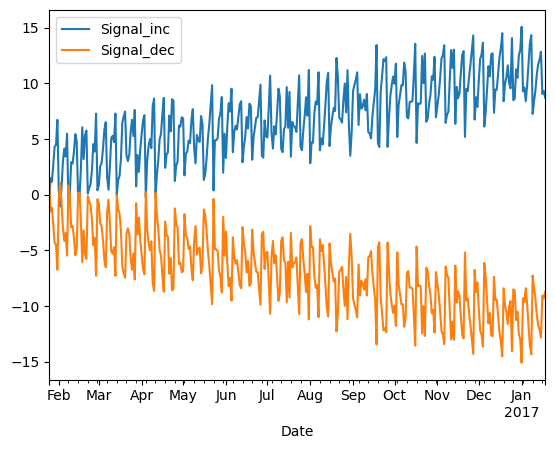

In [4]:
df_train.plot('Date' , ['Signal_inc', 'Signal_dec'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = ['Signal_dec' , 'Signal_inc'], iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizons': {'Signal_dec': 7, 'Signal_inc': 7}}
INFO:pyaf.std:TRAINING_ENGINE_END 4.385
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal_dec' Length=360  Min=-15.092776 Max=1.513171  Mean=-6.99289 StdDev=3.446119
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal_dec' Min=0.0 Max=1.0  Mean=0.48777 StdDev=0.207523
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_dec_LinearTrend_residue_Cycle_7_residue_NoAR' [LinearTrend + Cycle_7 + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Signal_dec_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_dec_LinearTrend_residue_Cycle_7' [Cycle_7]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_dec_LinearTrend_residue_Cycle_

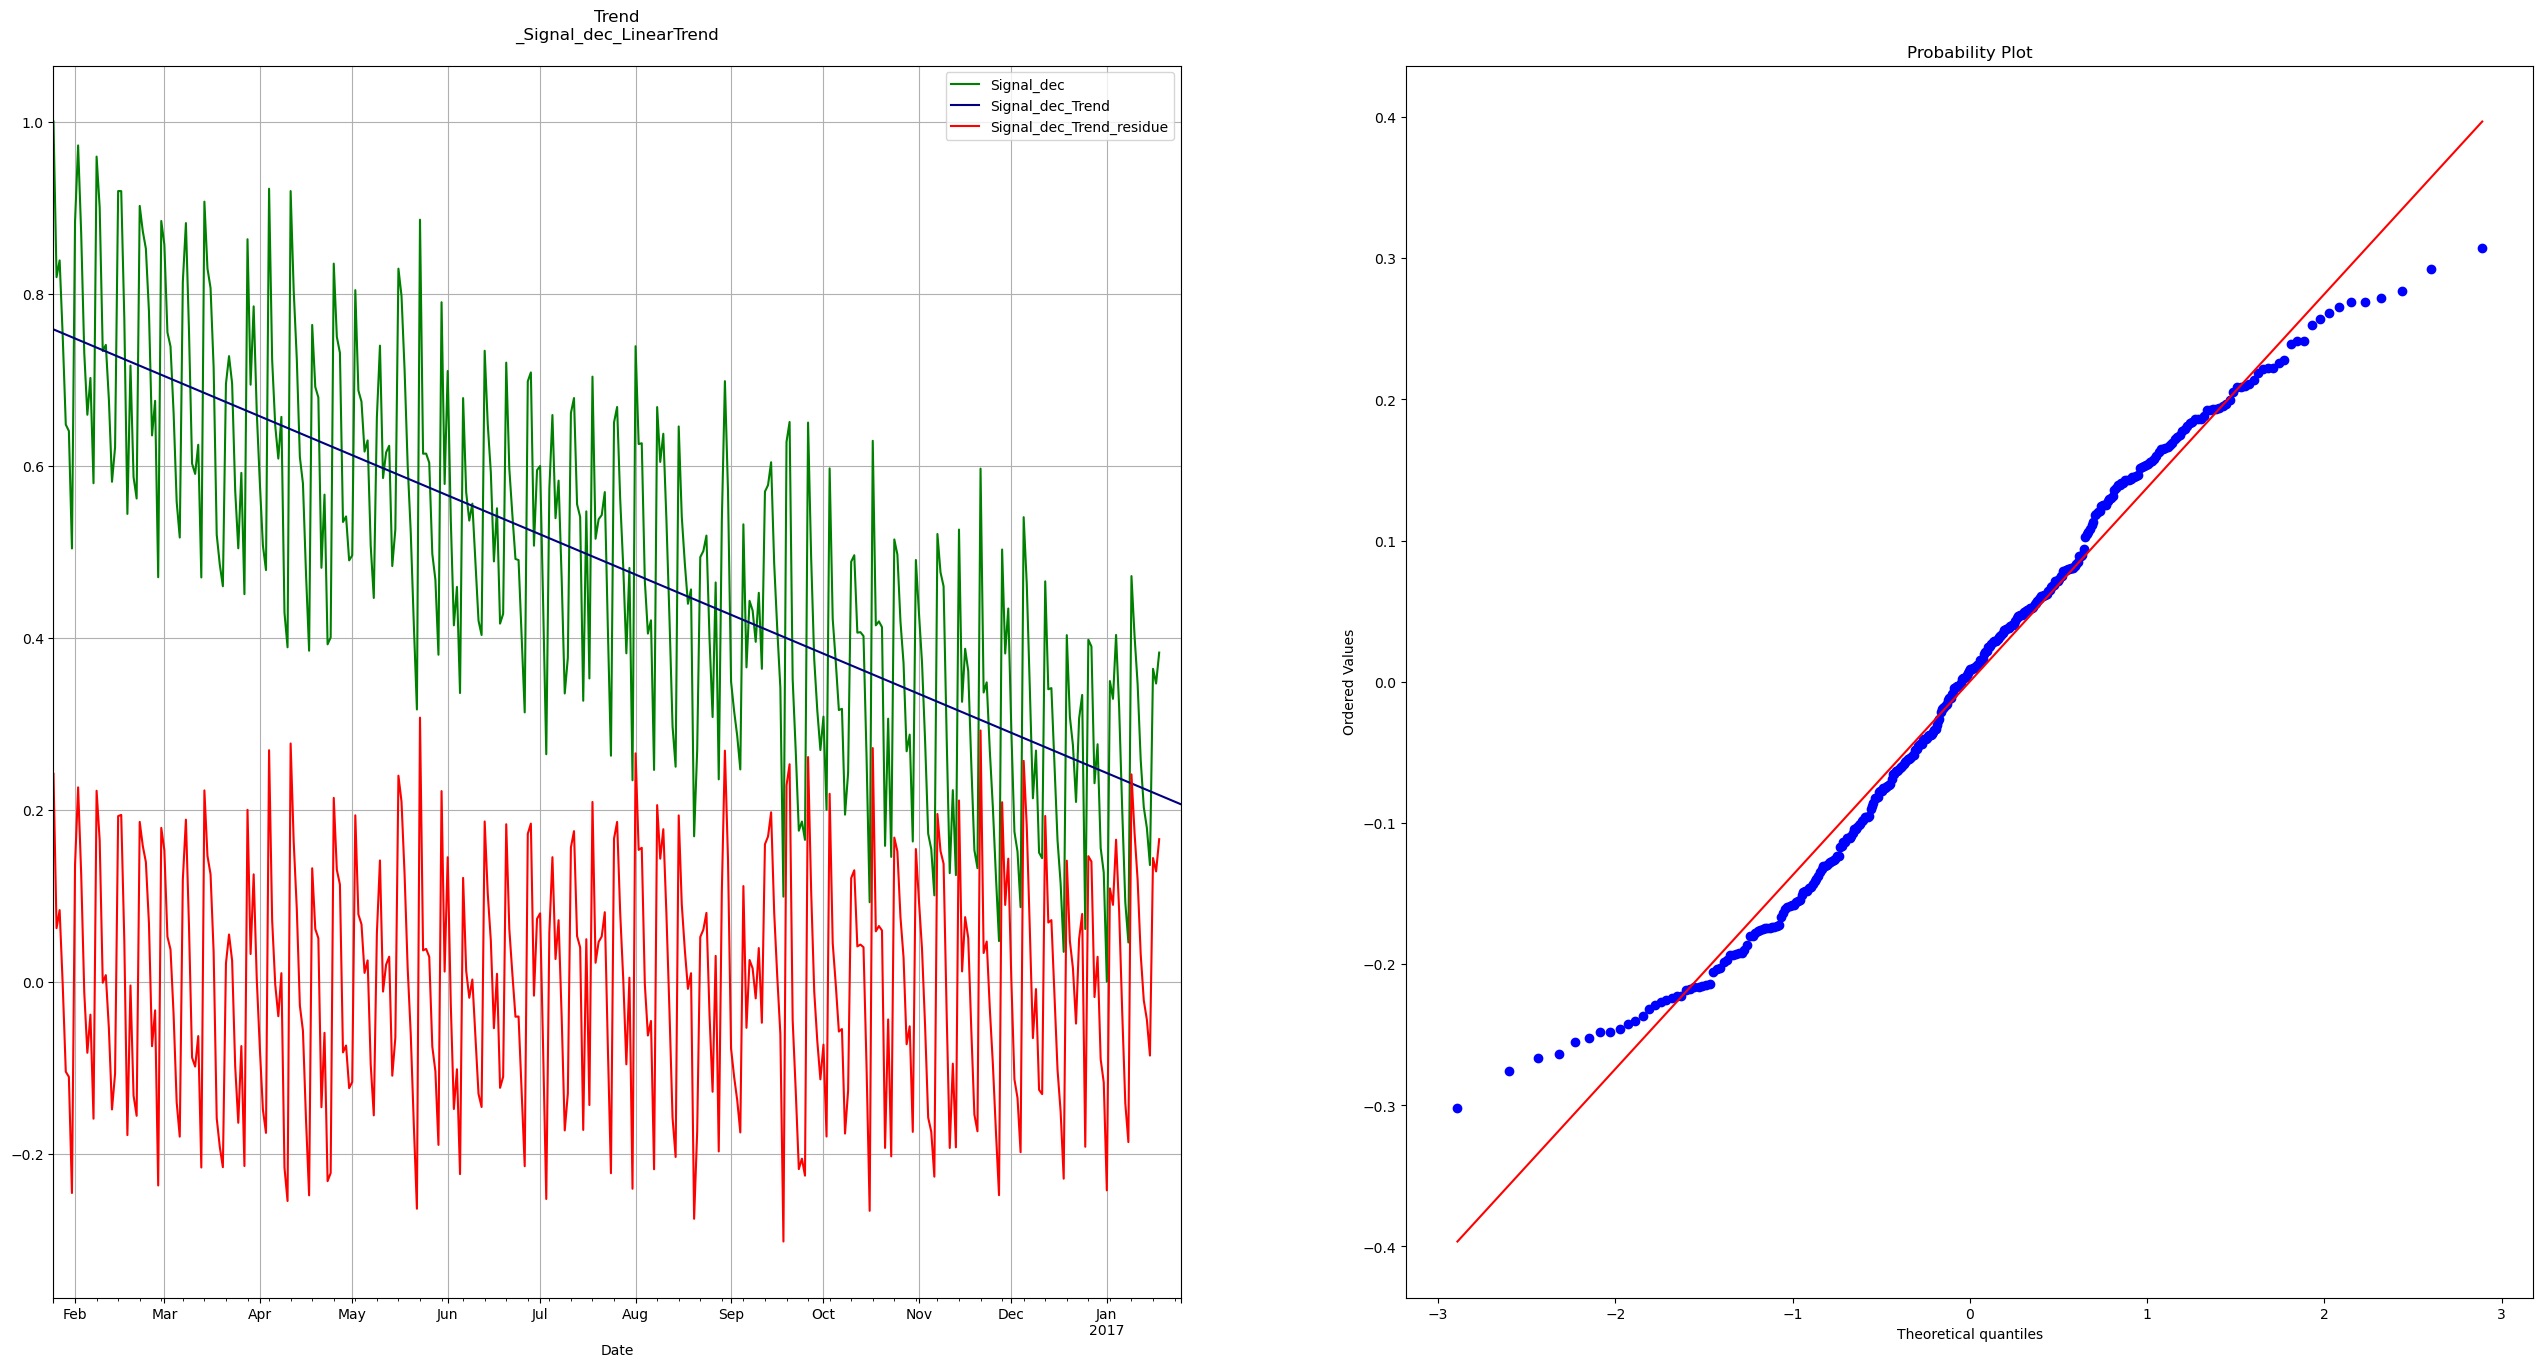

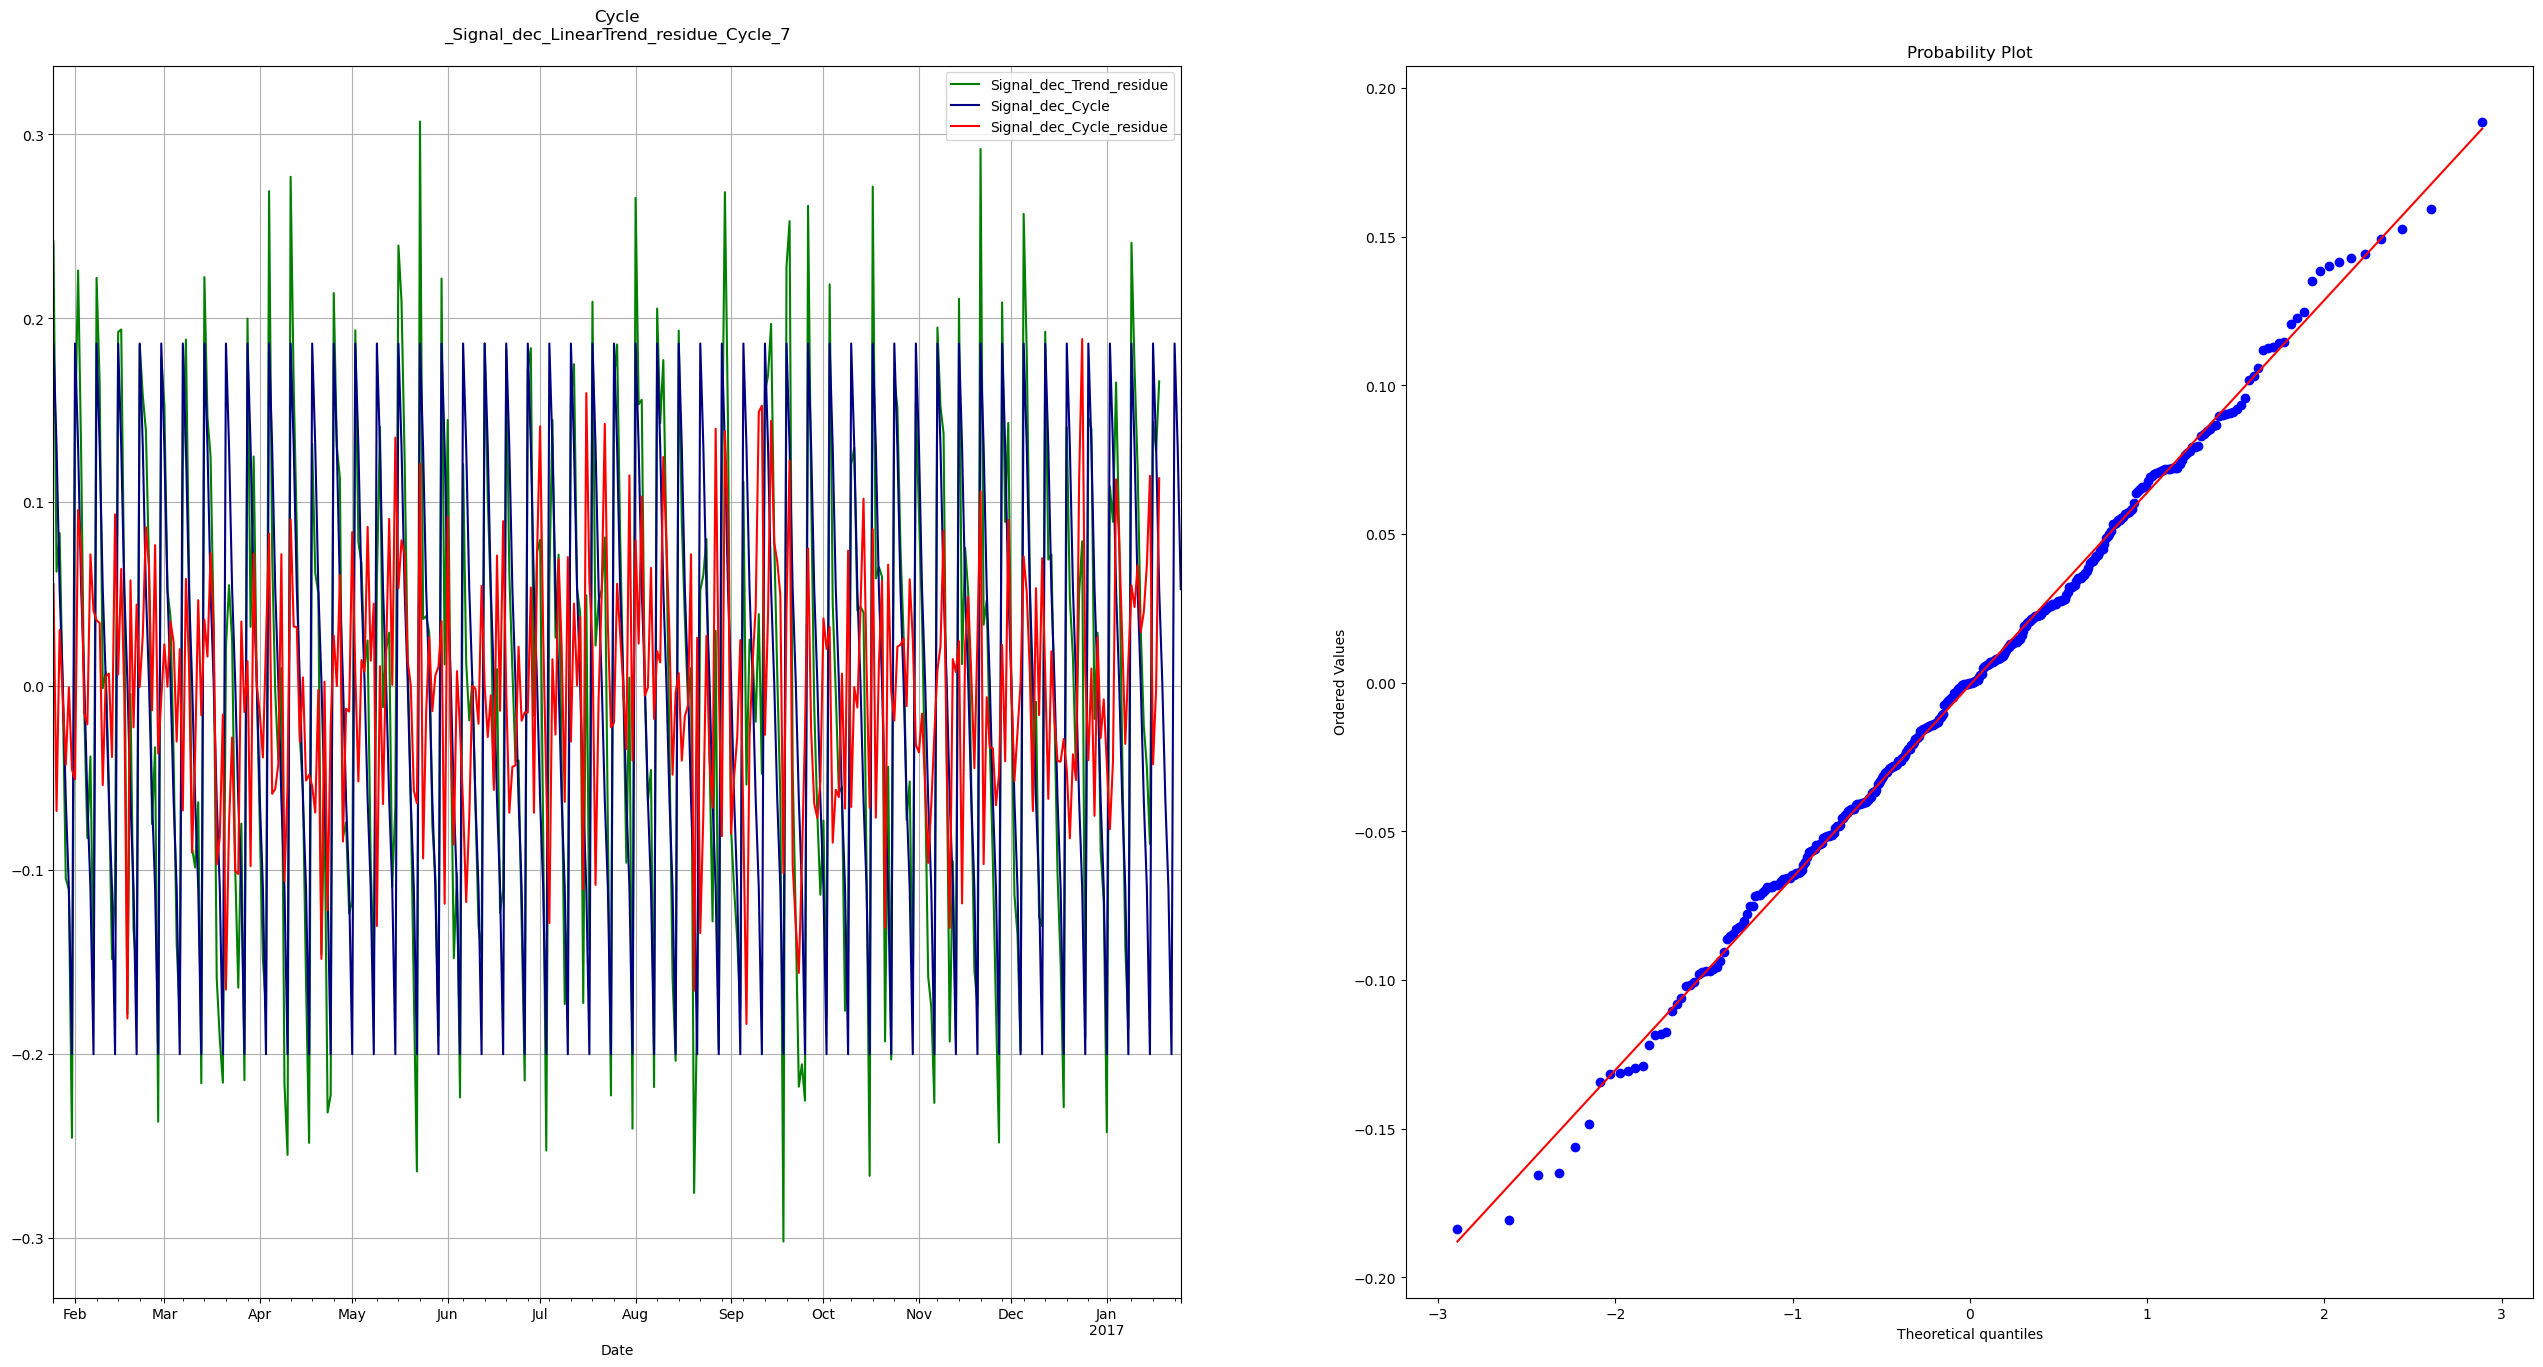

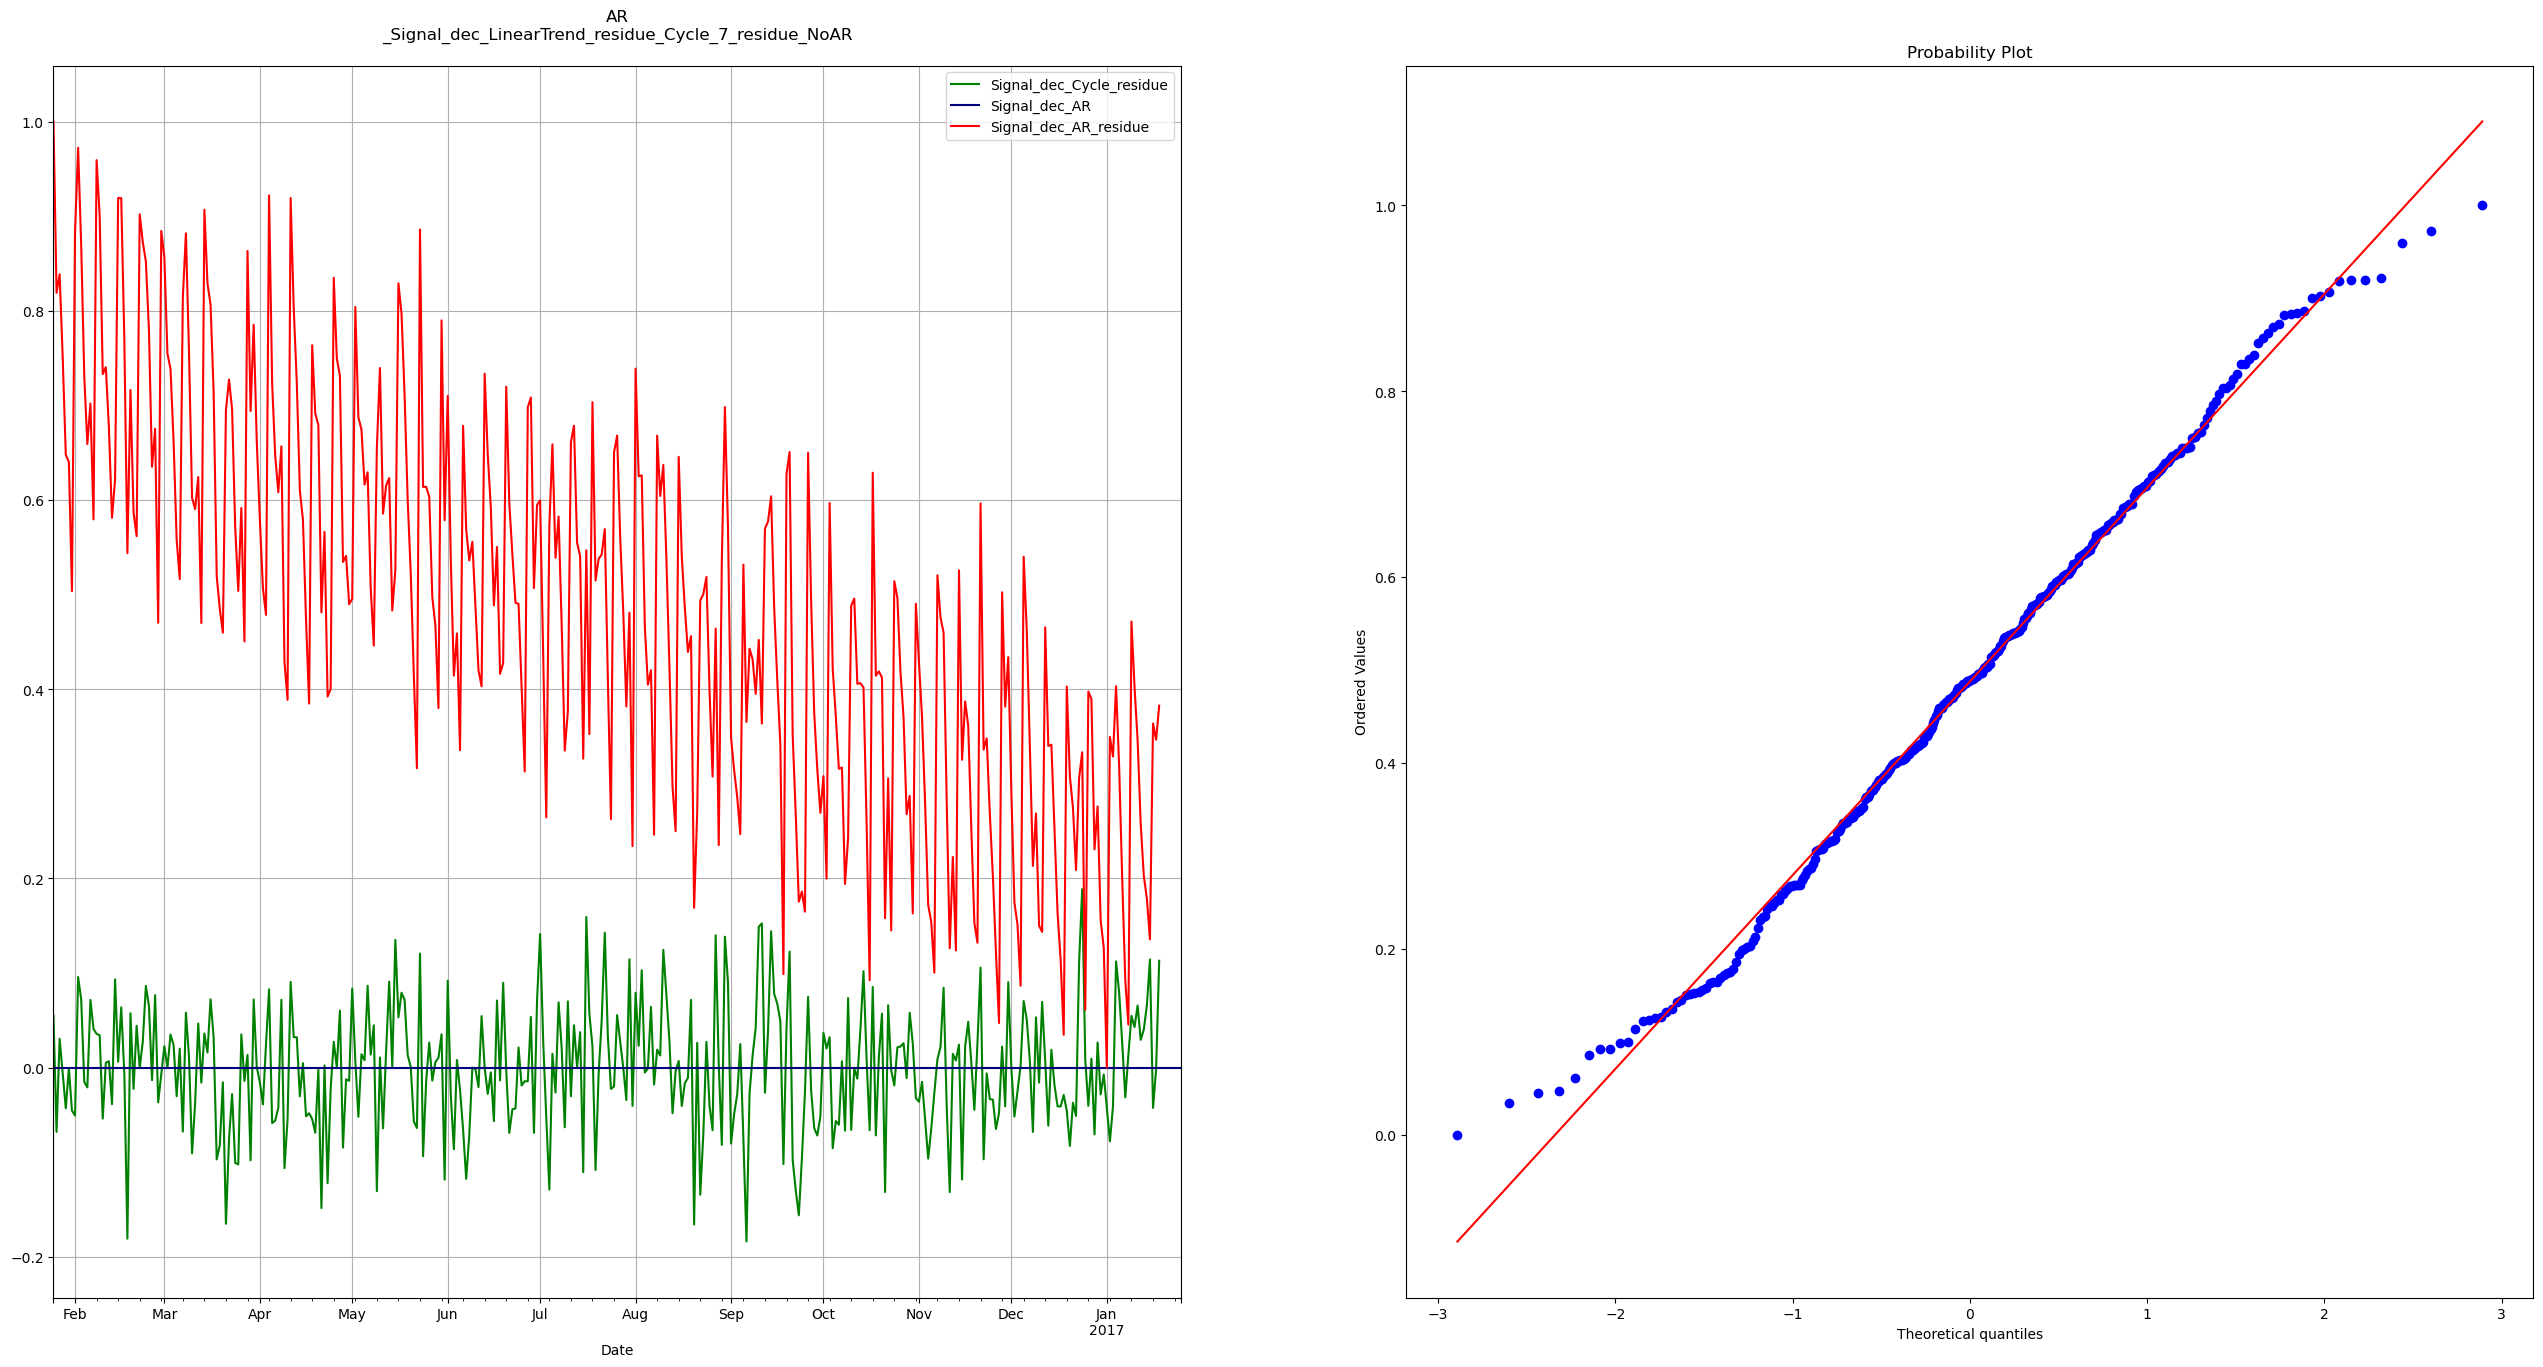

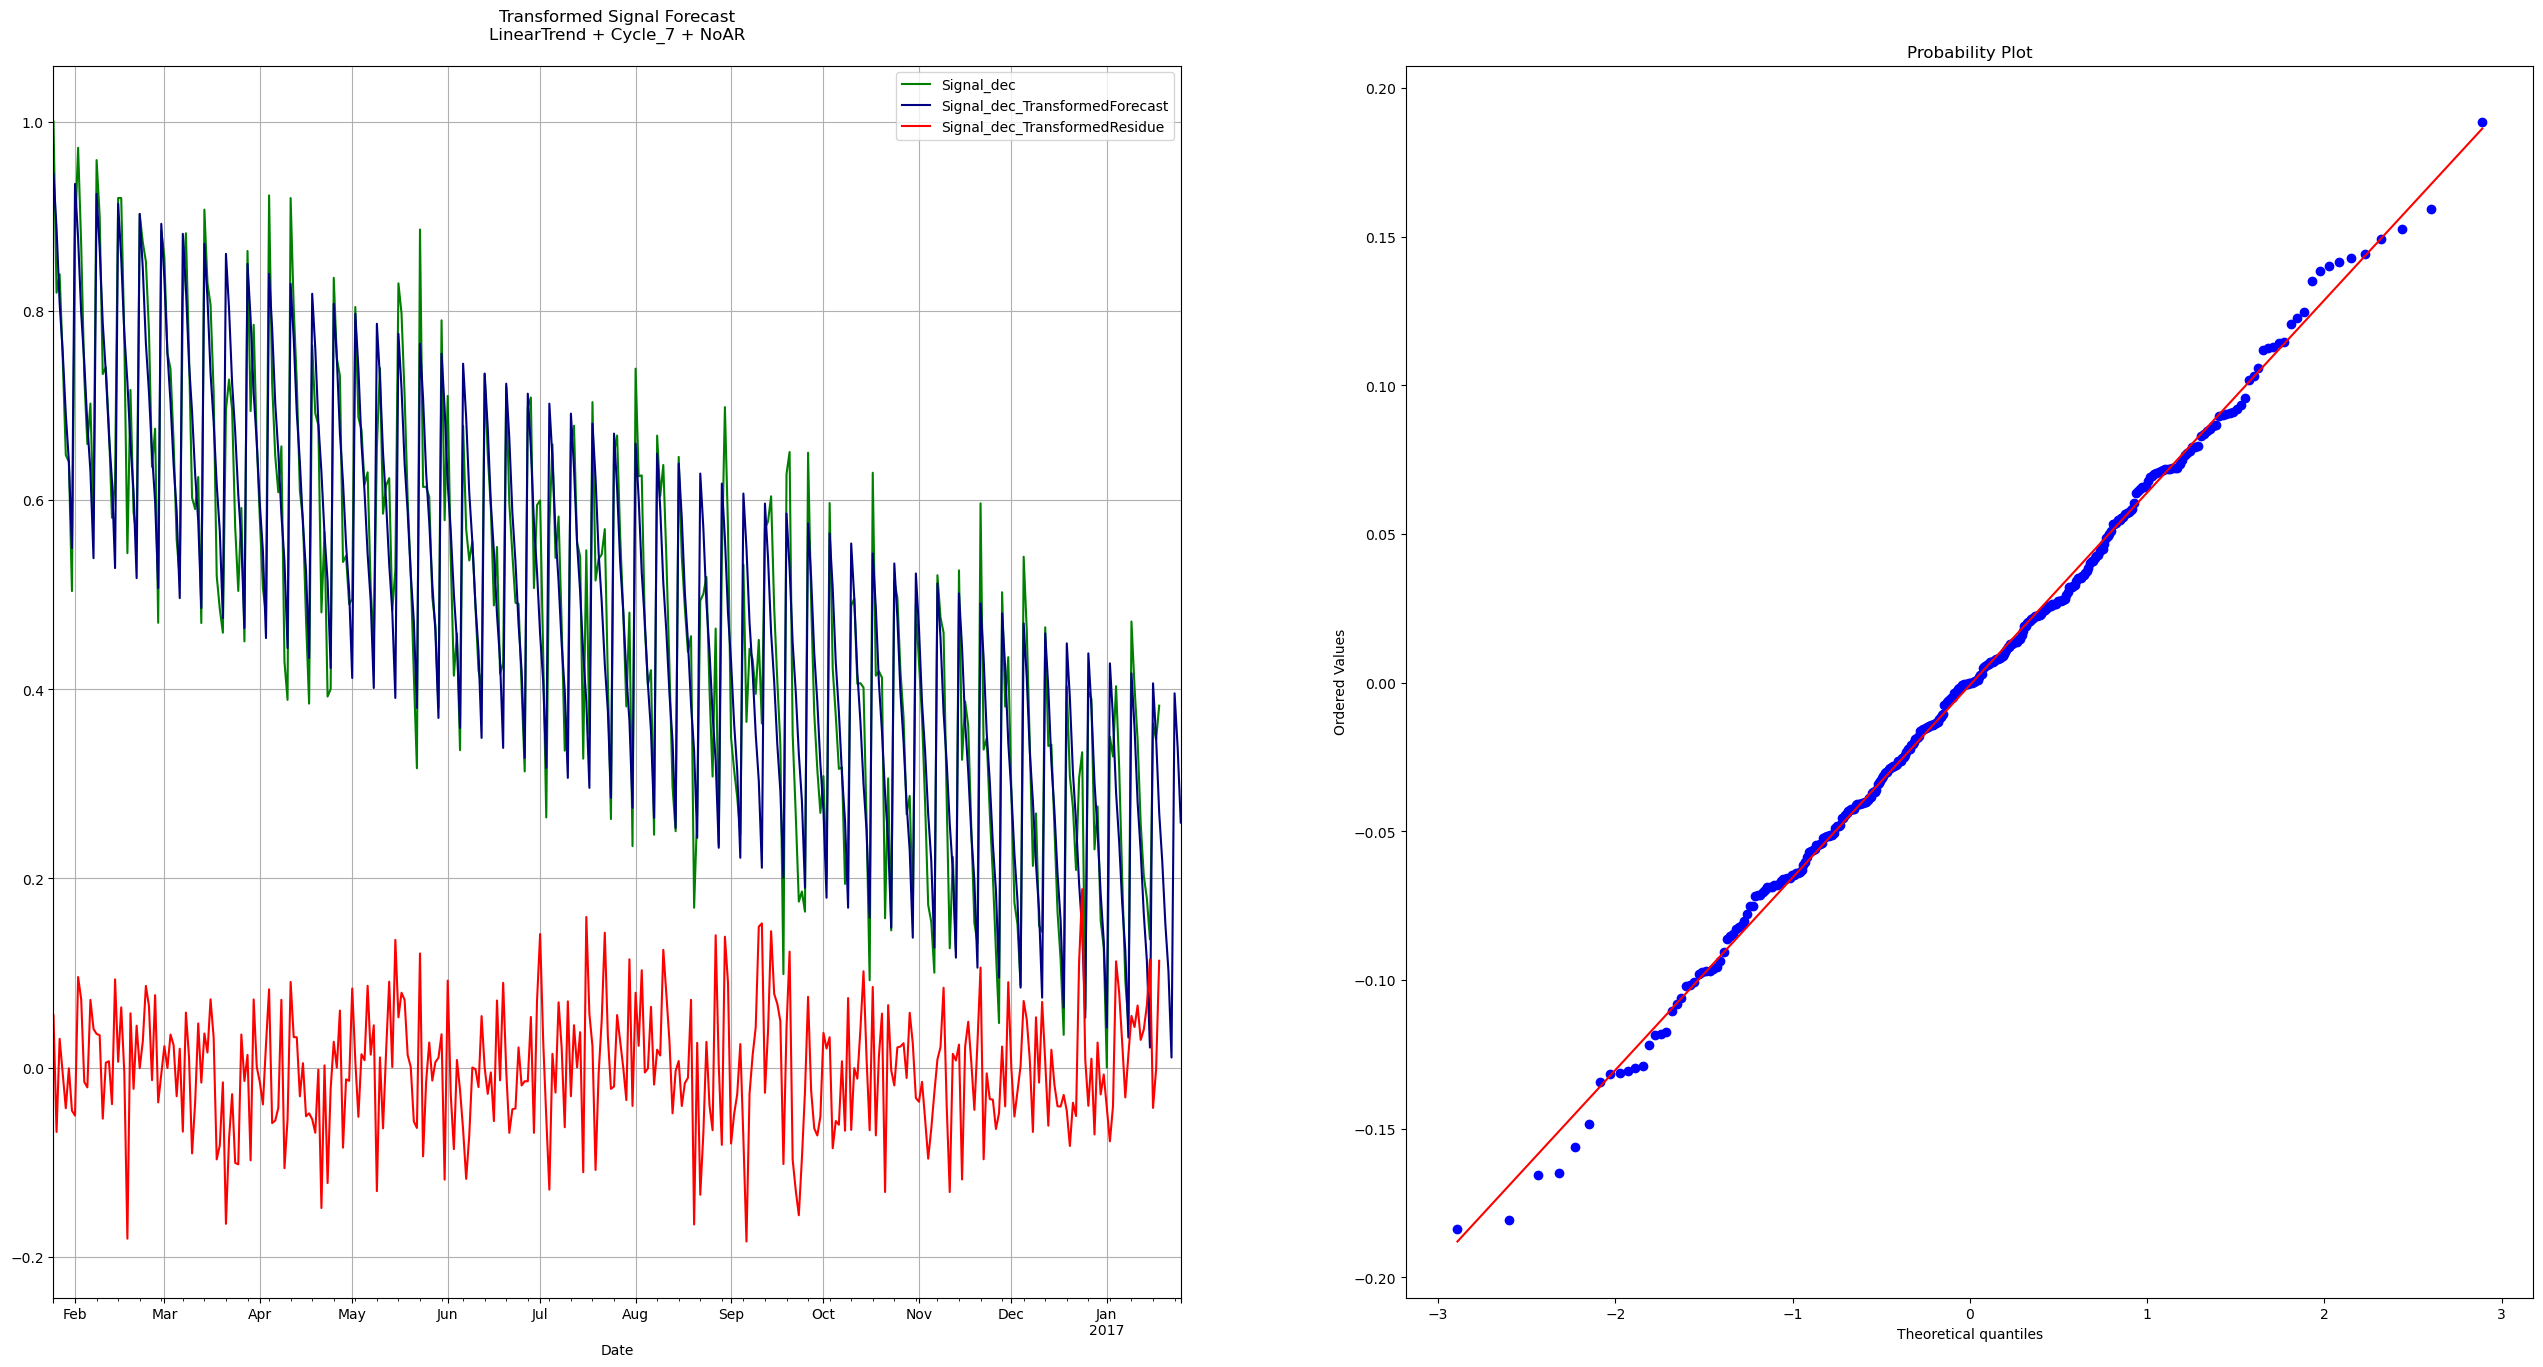

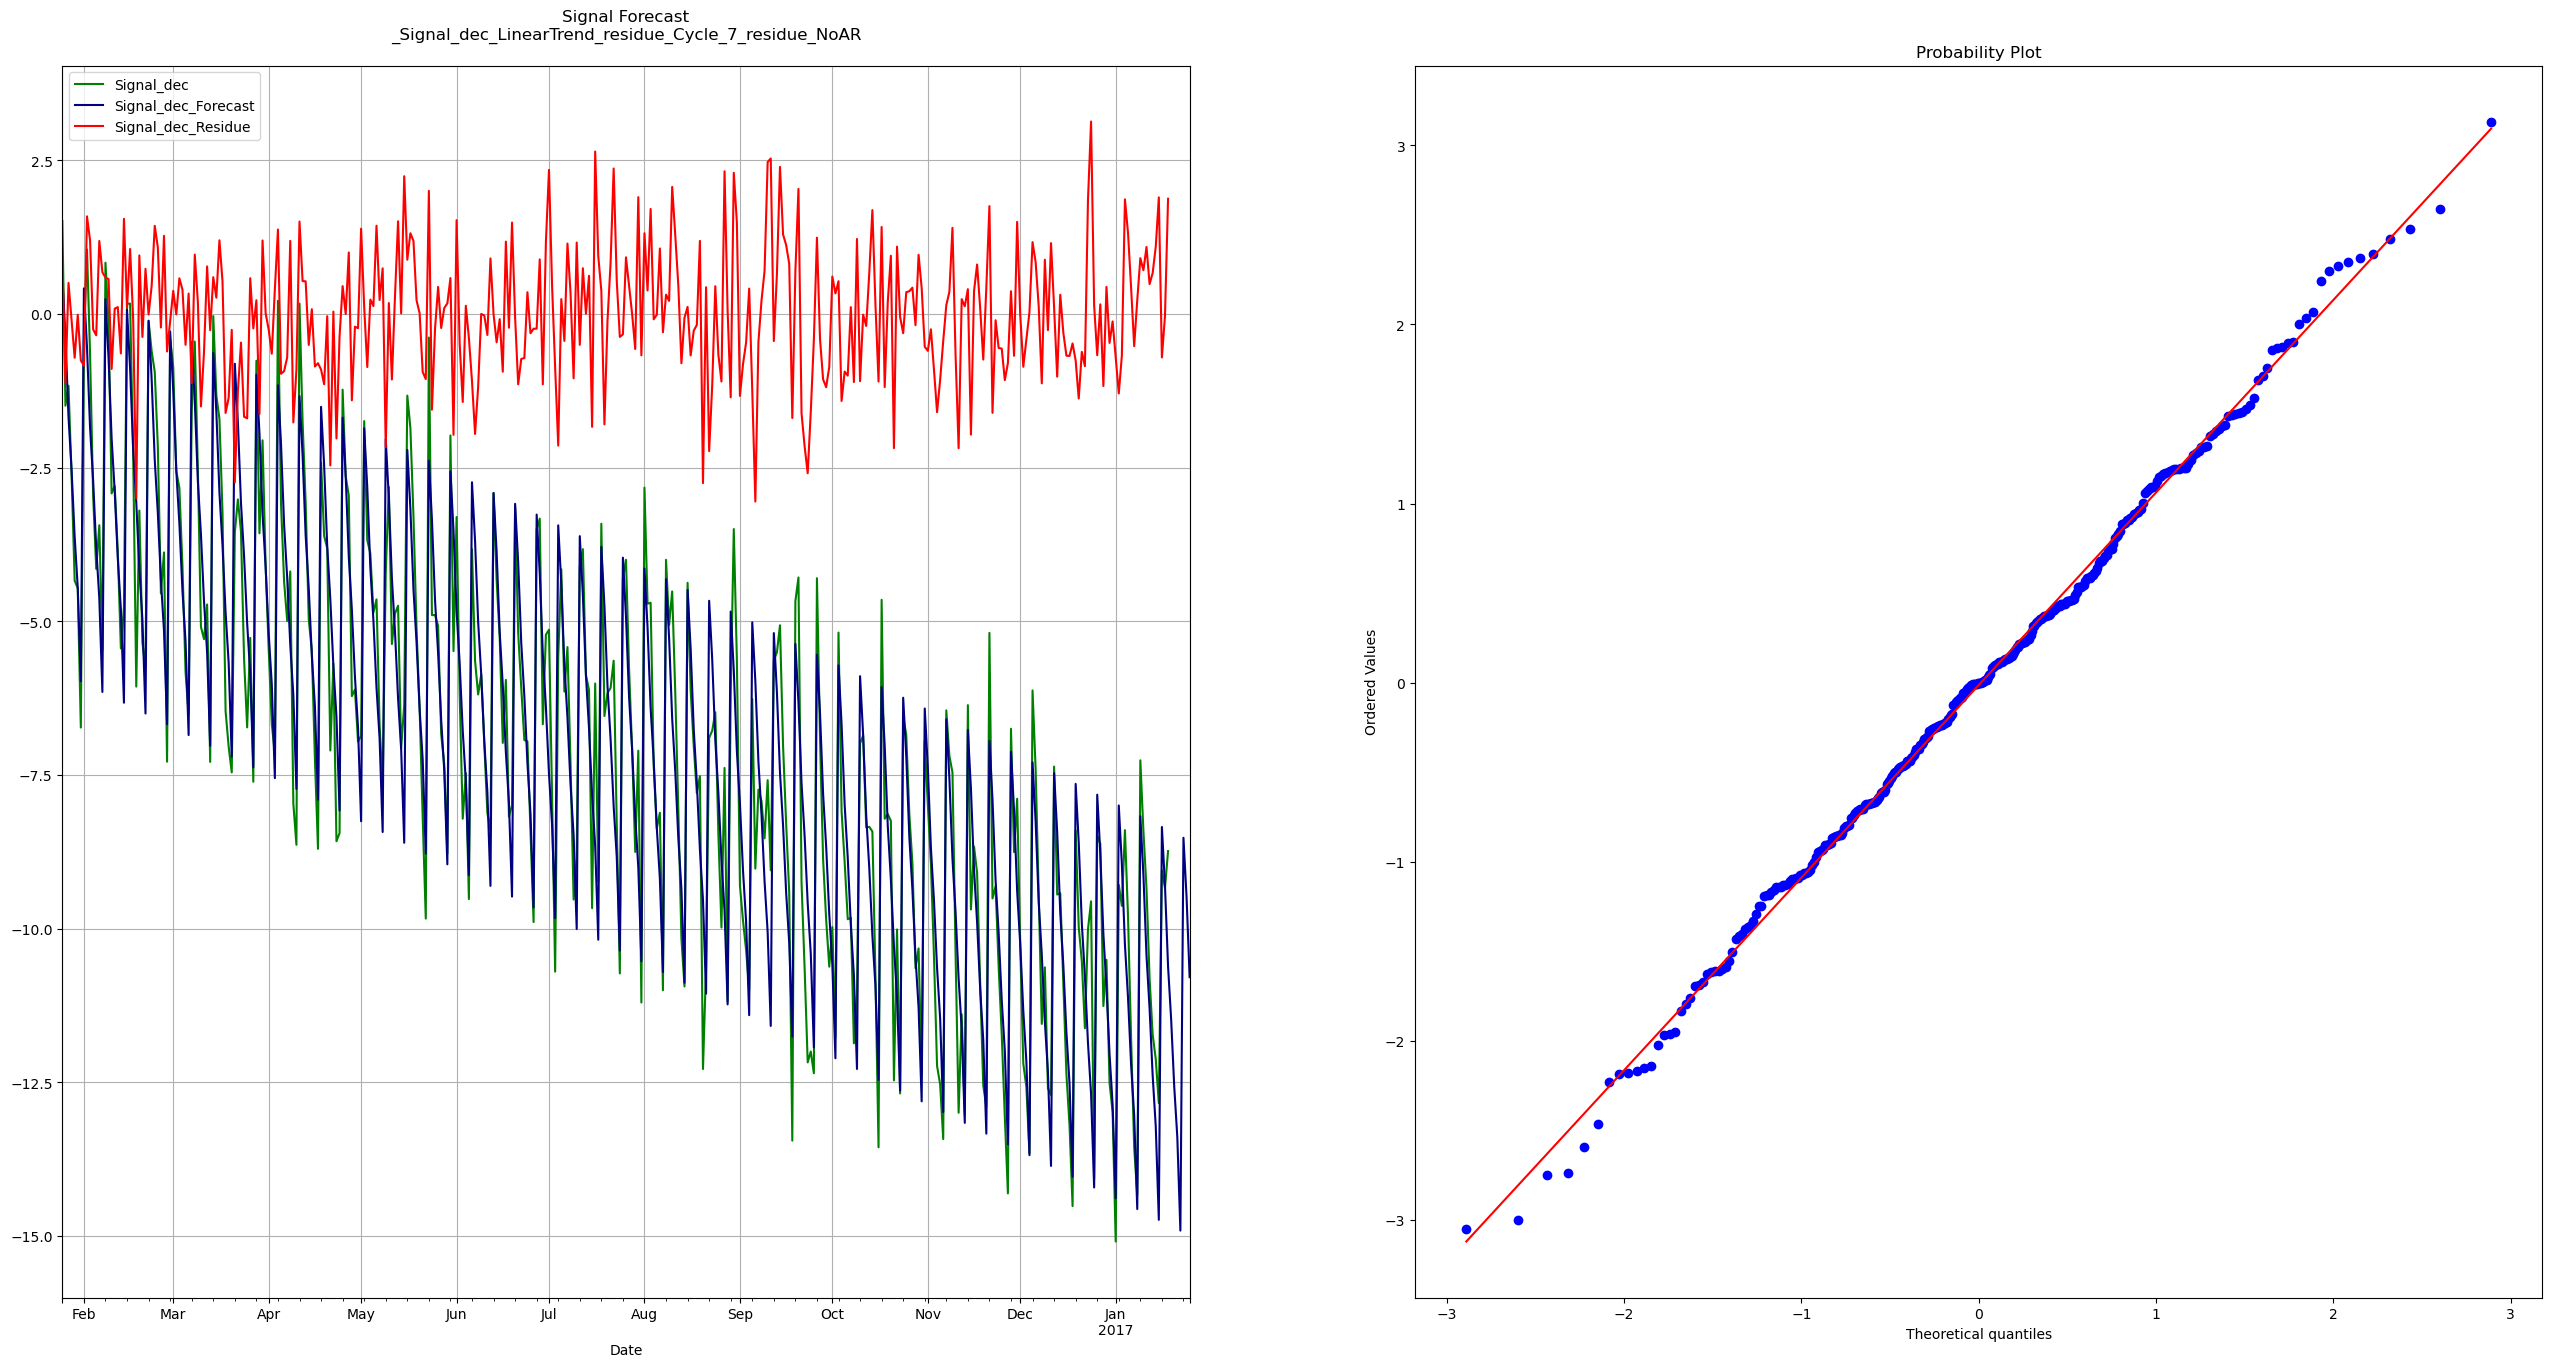

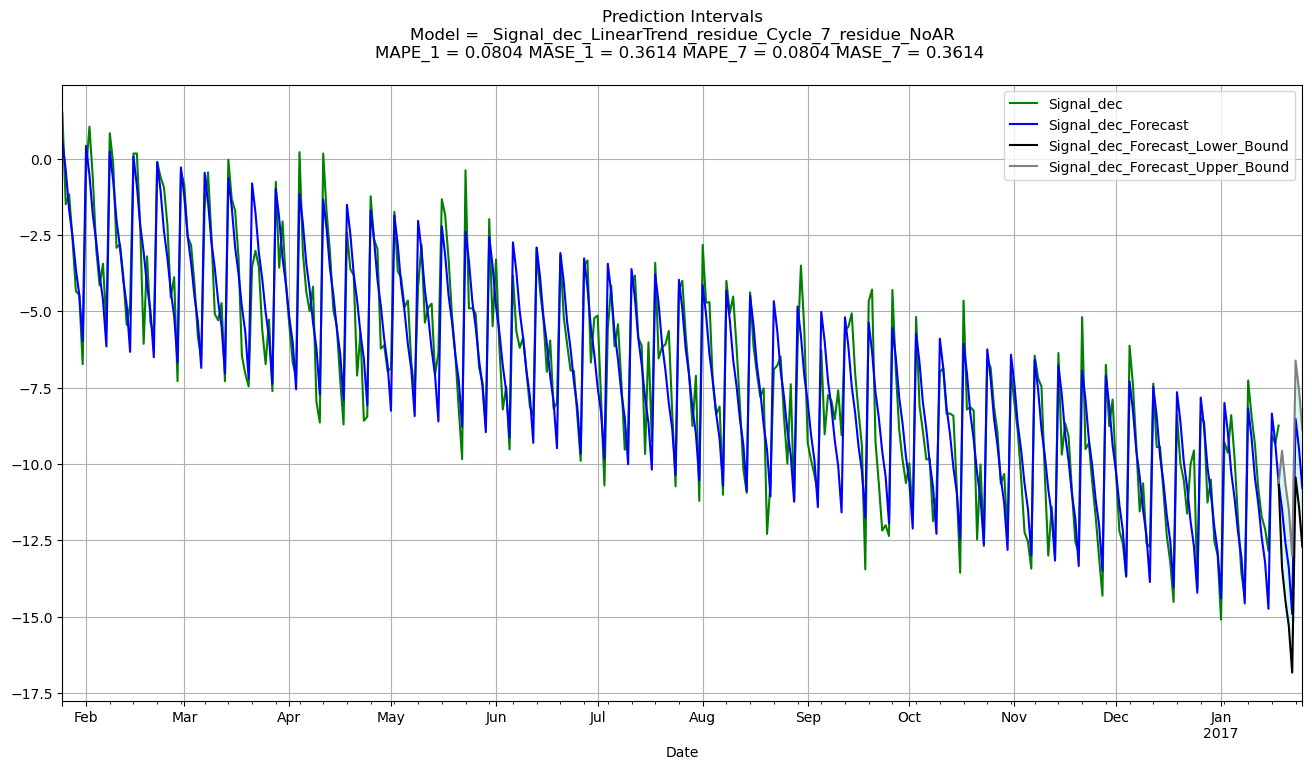

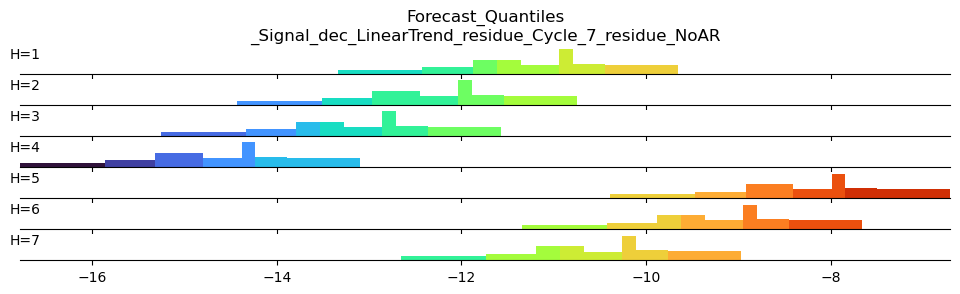

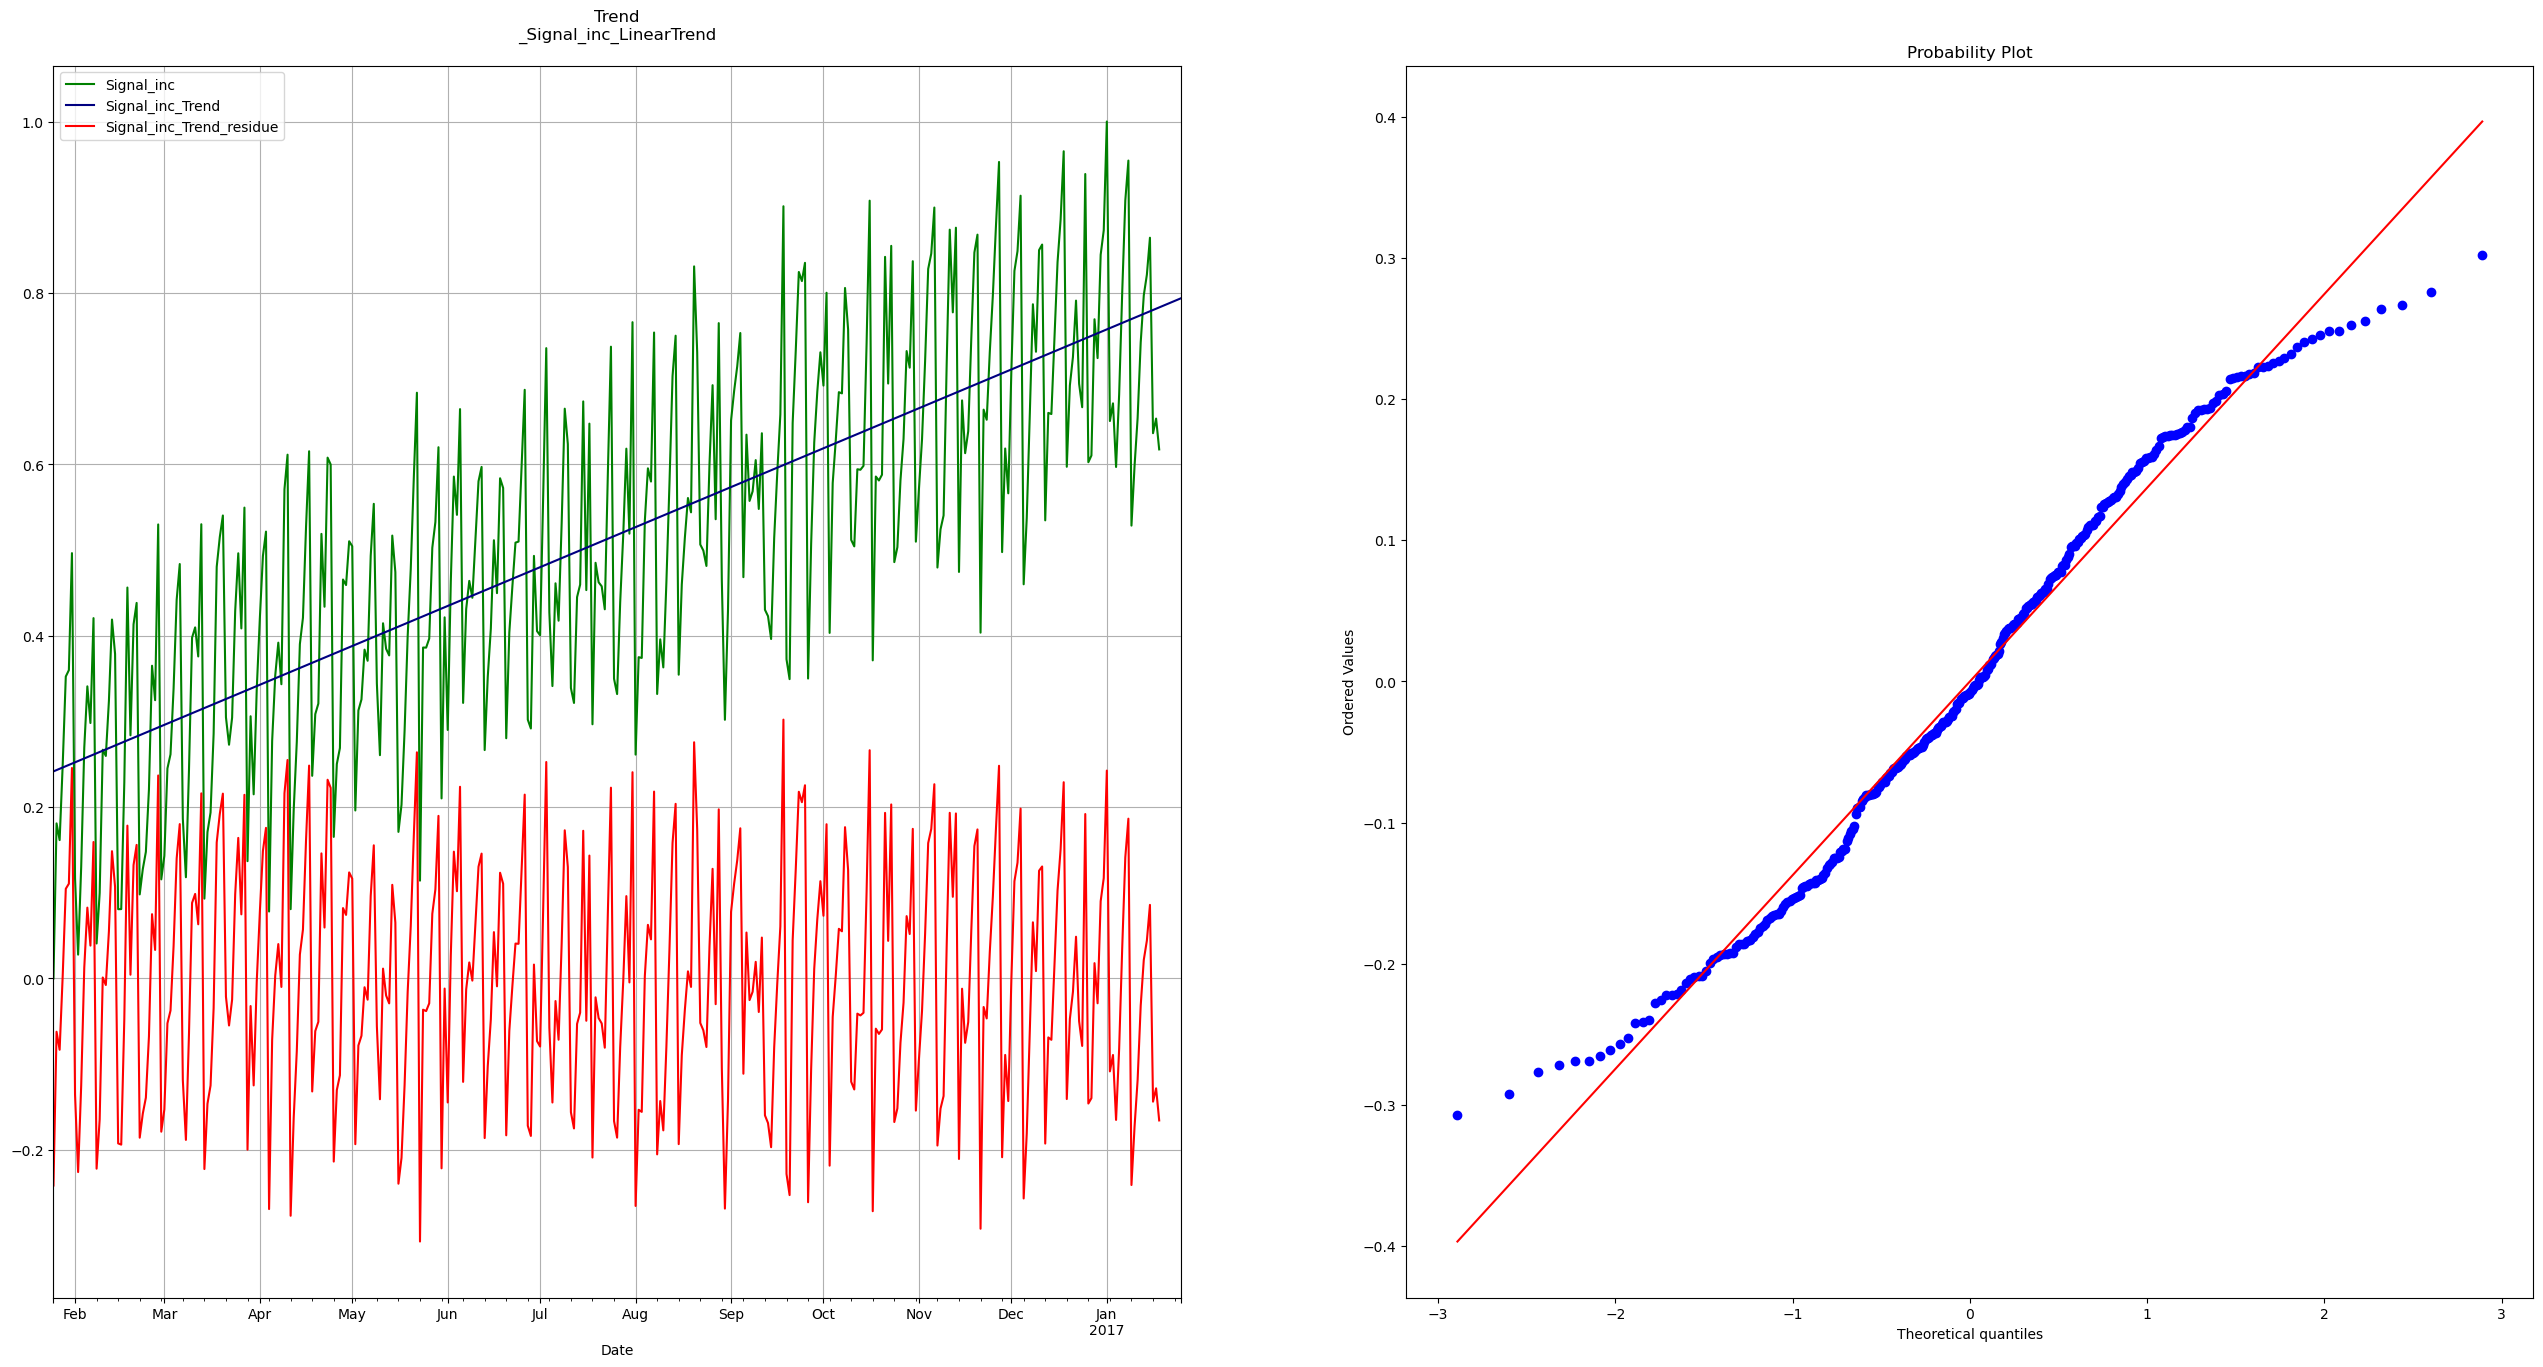

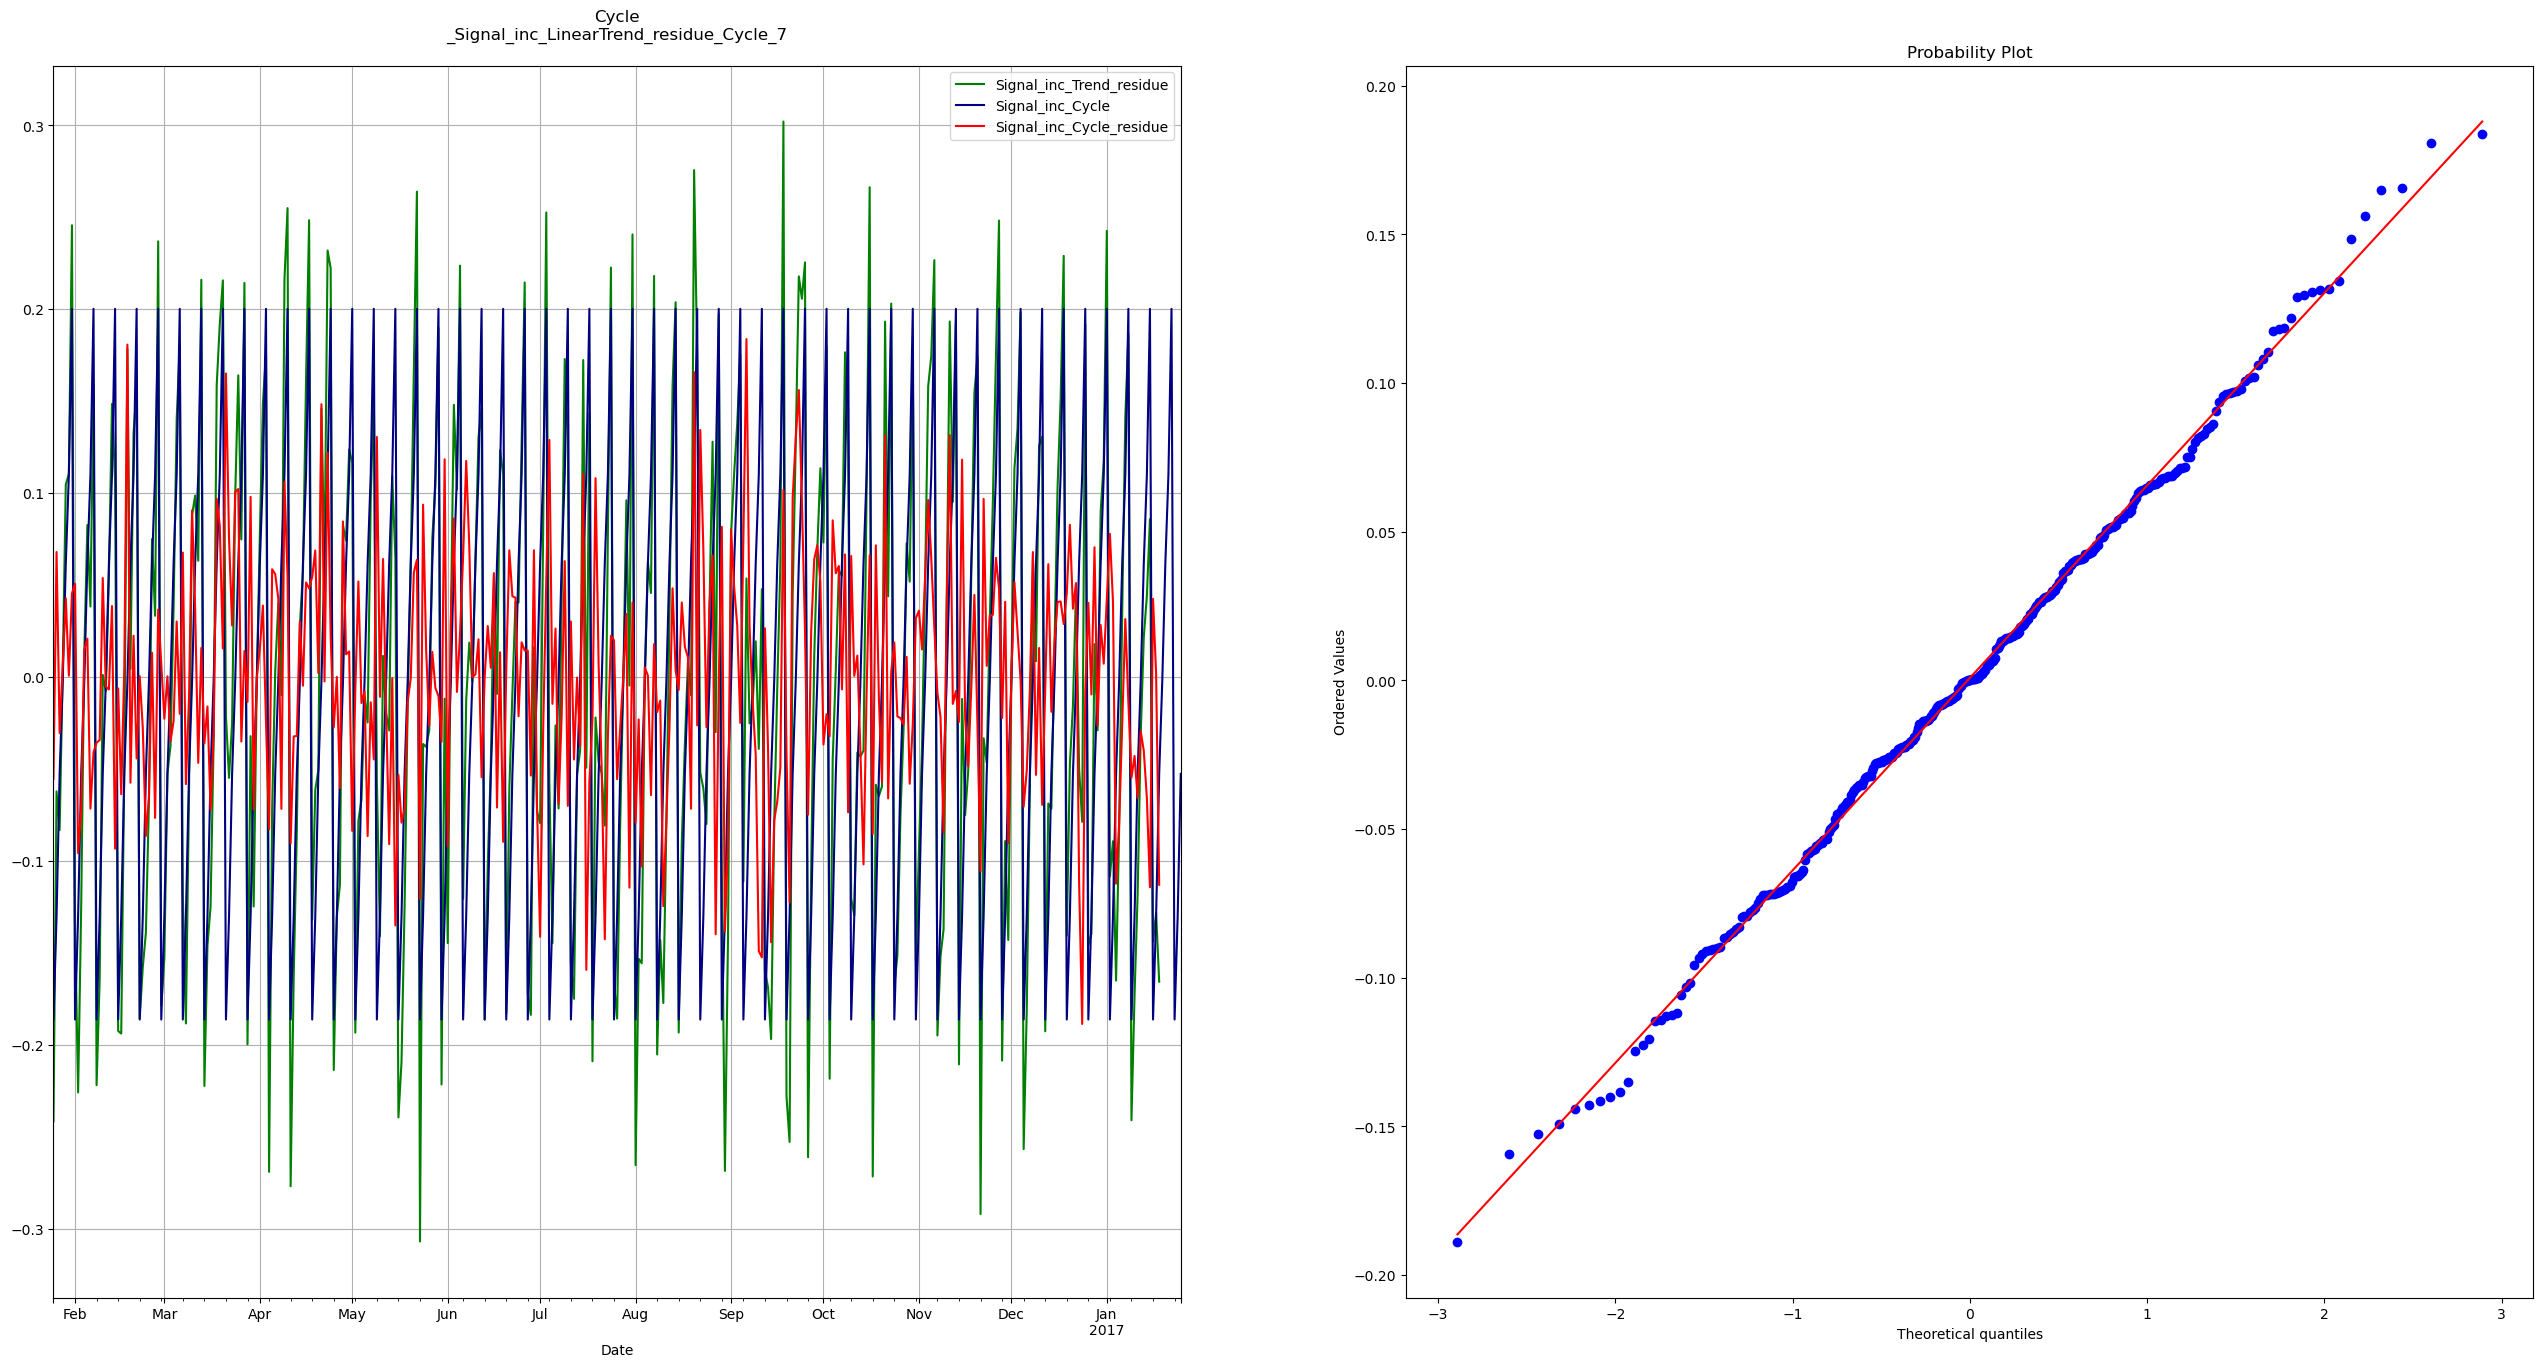

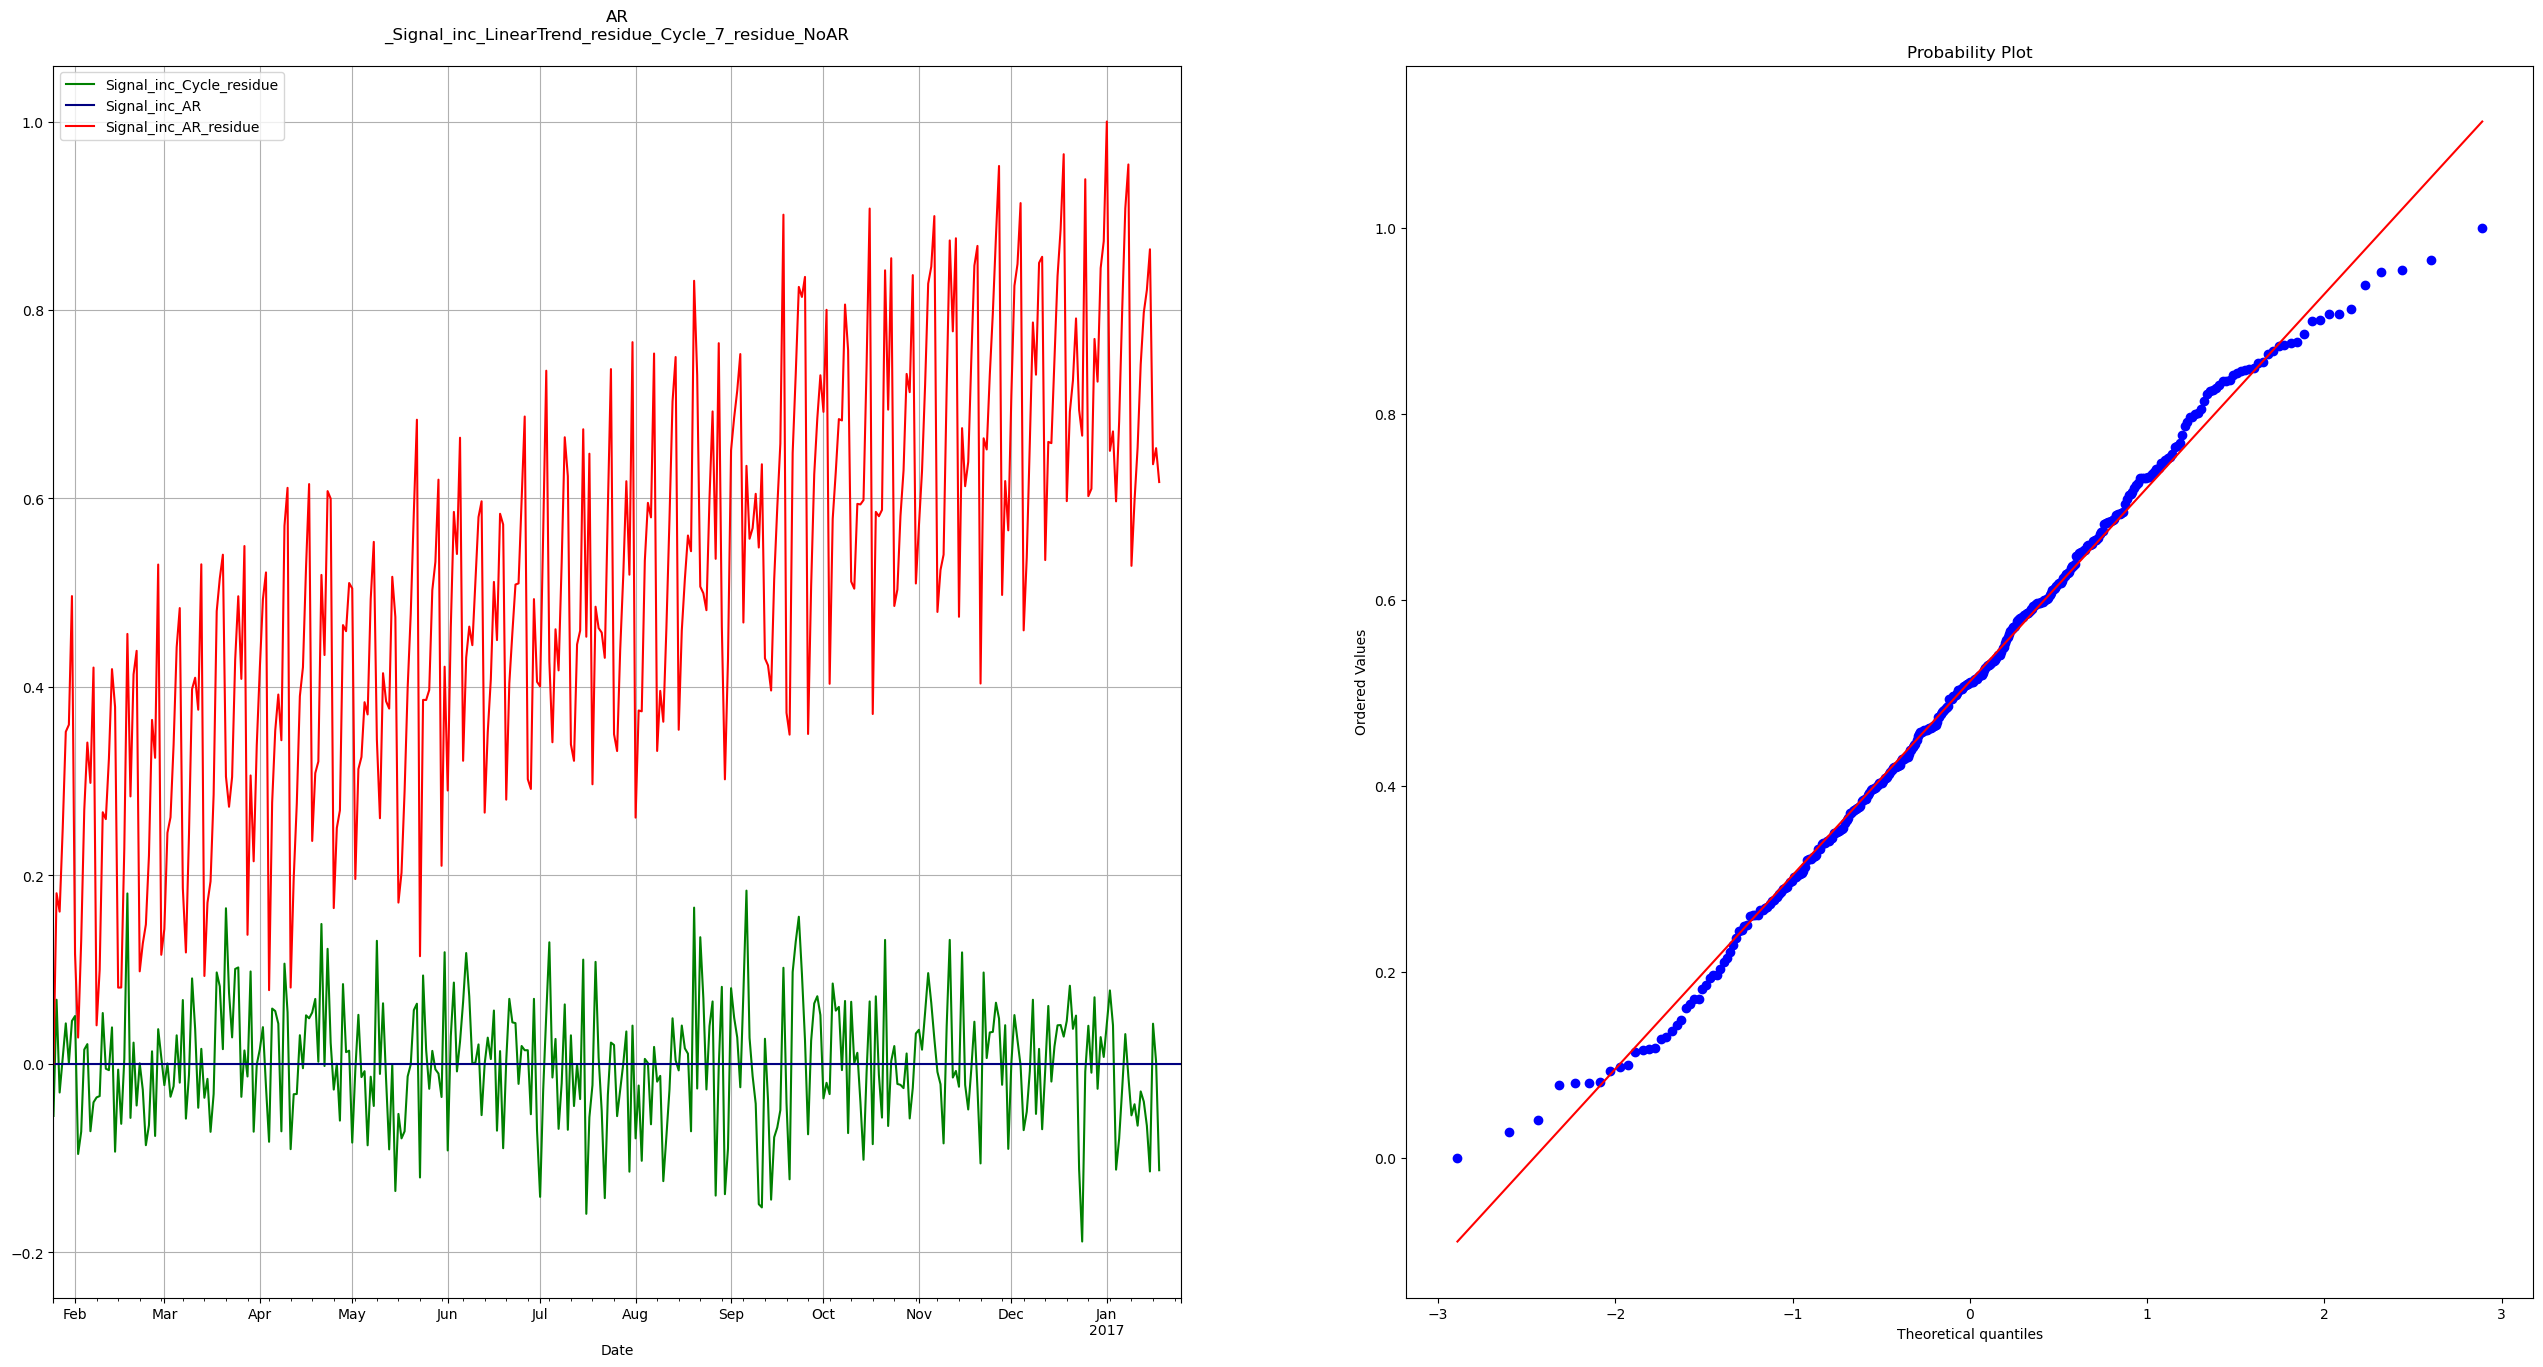

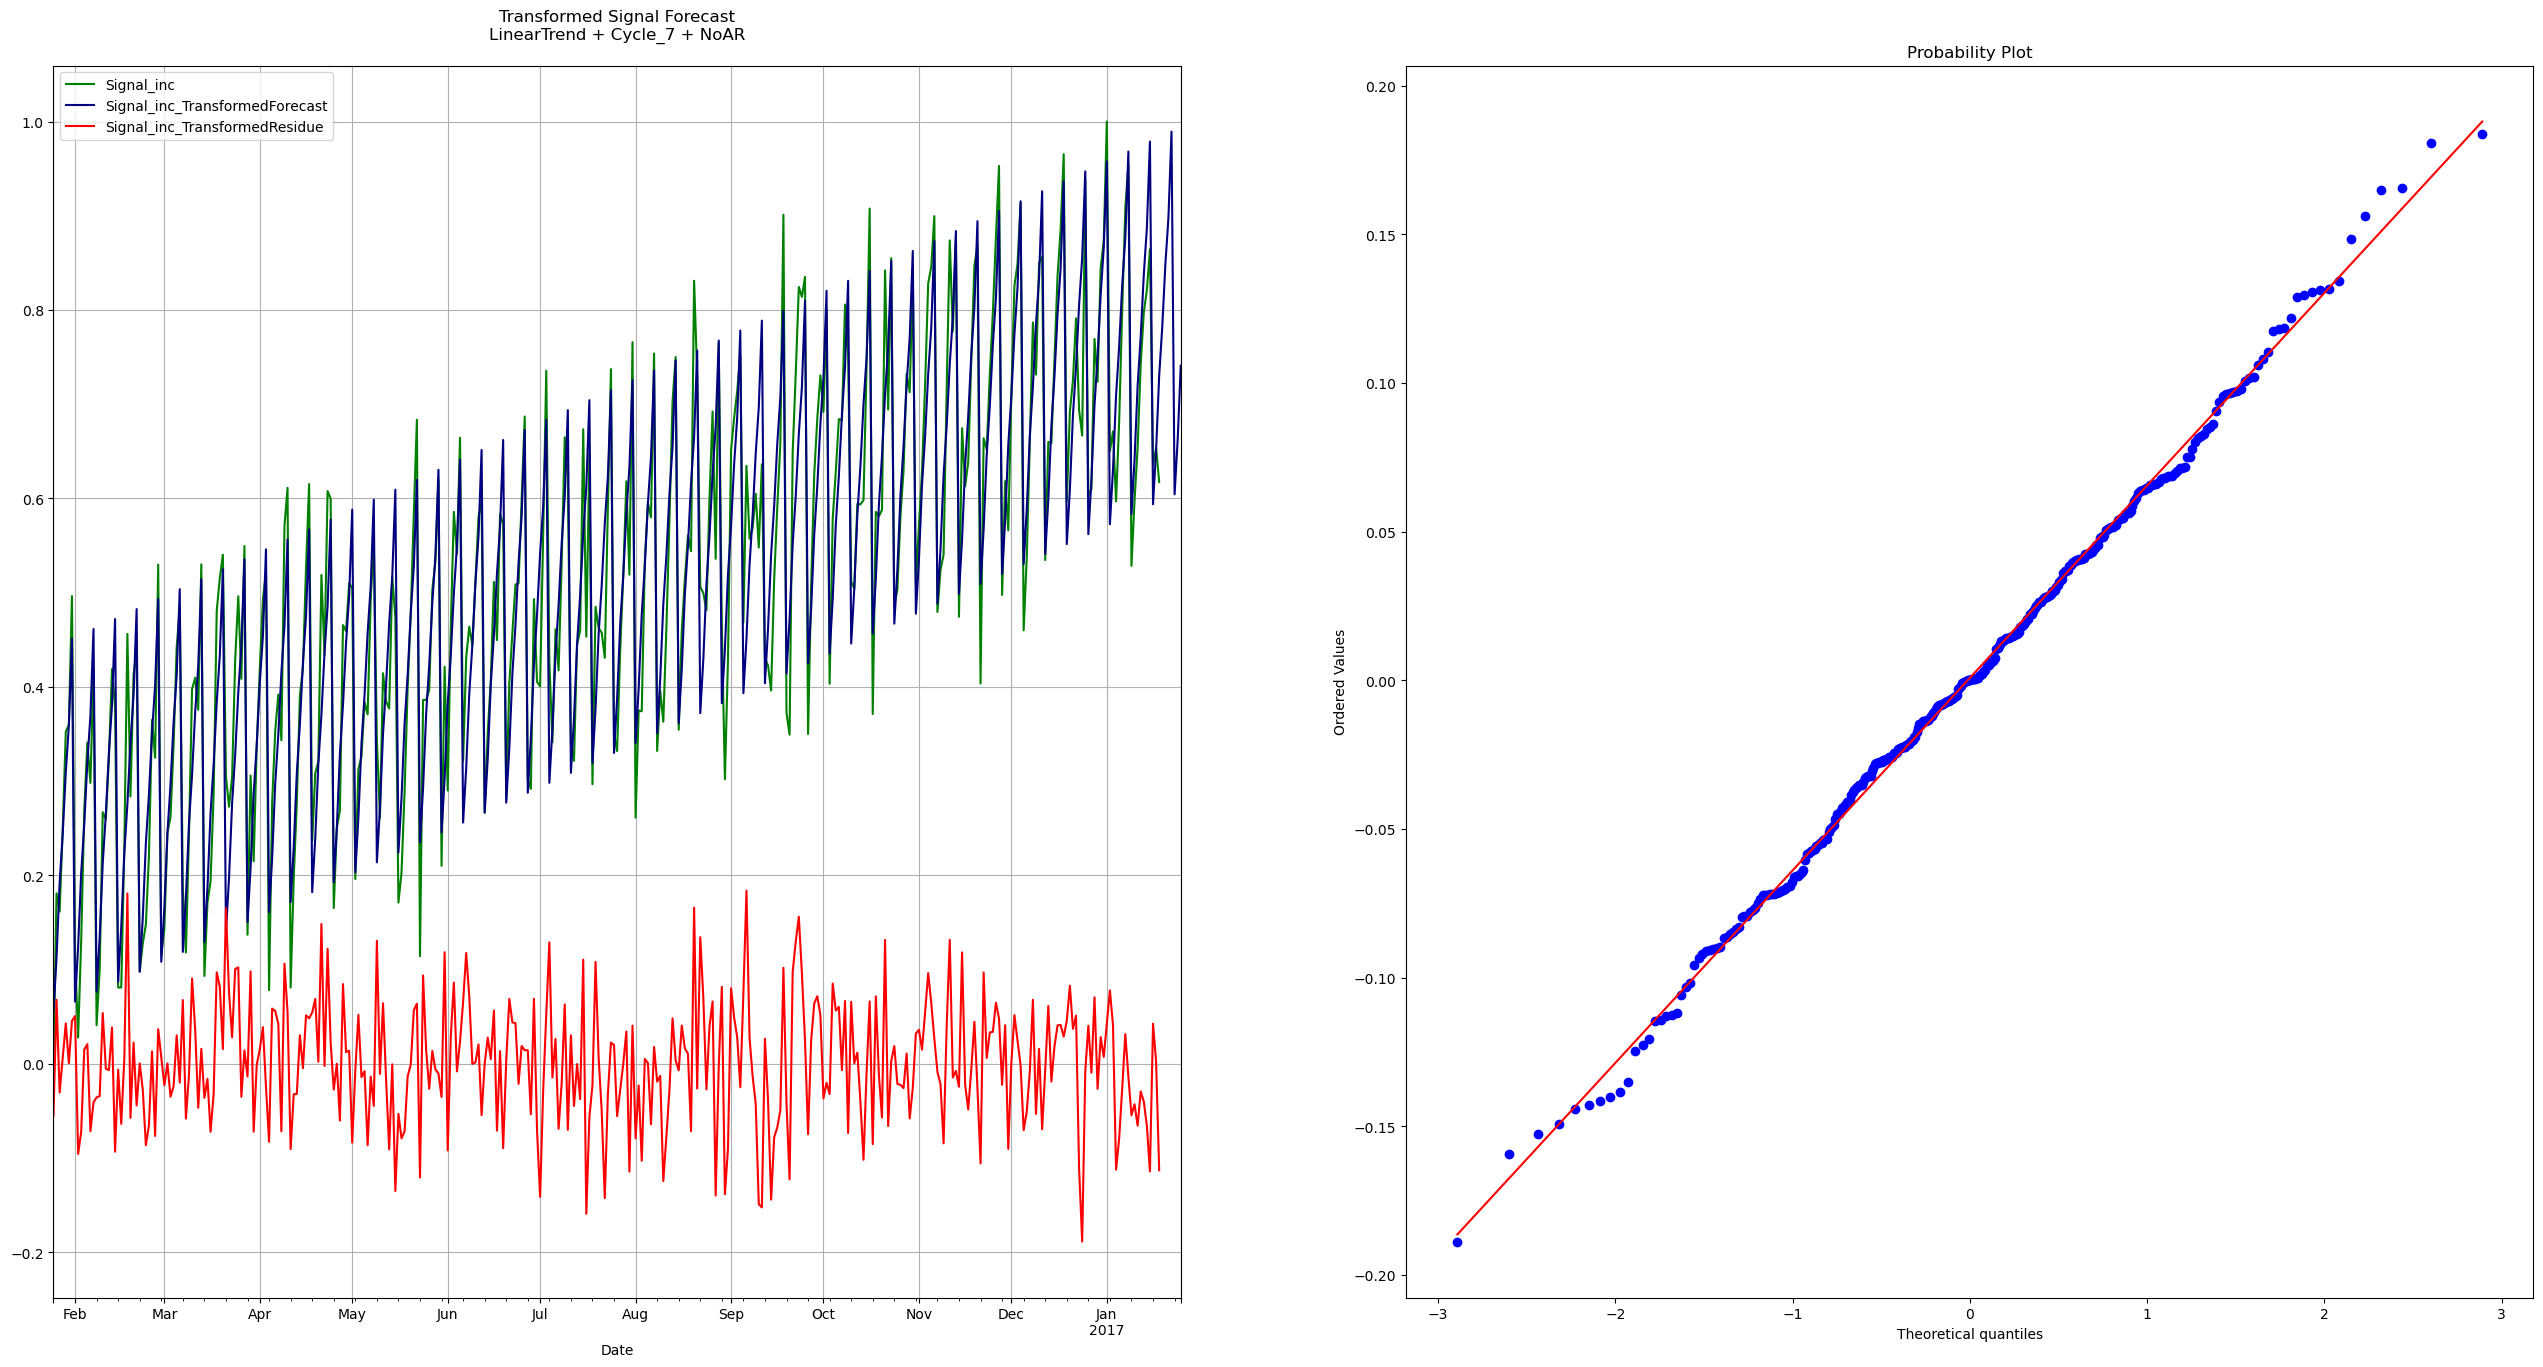

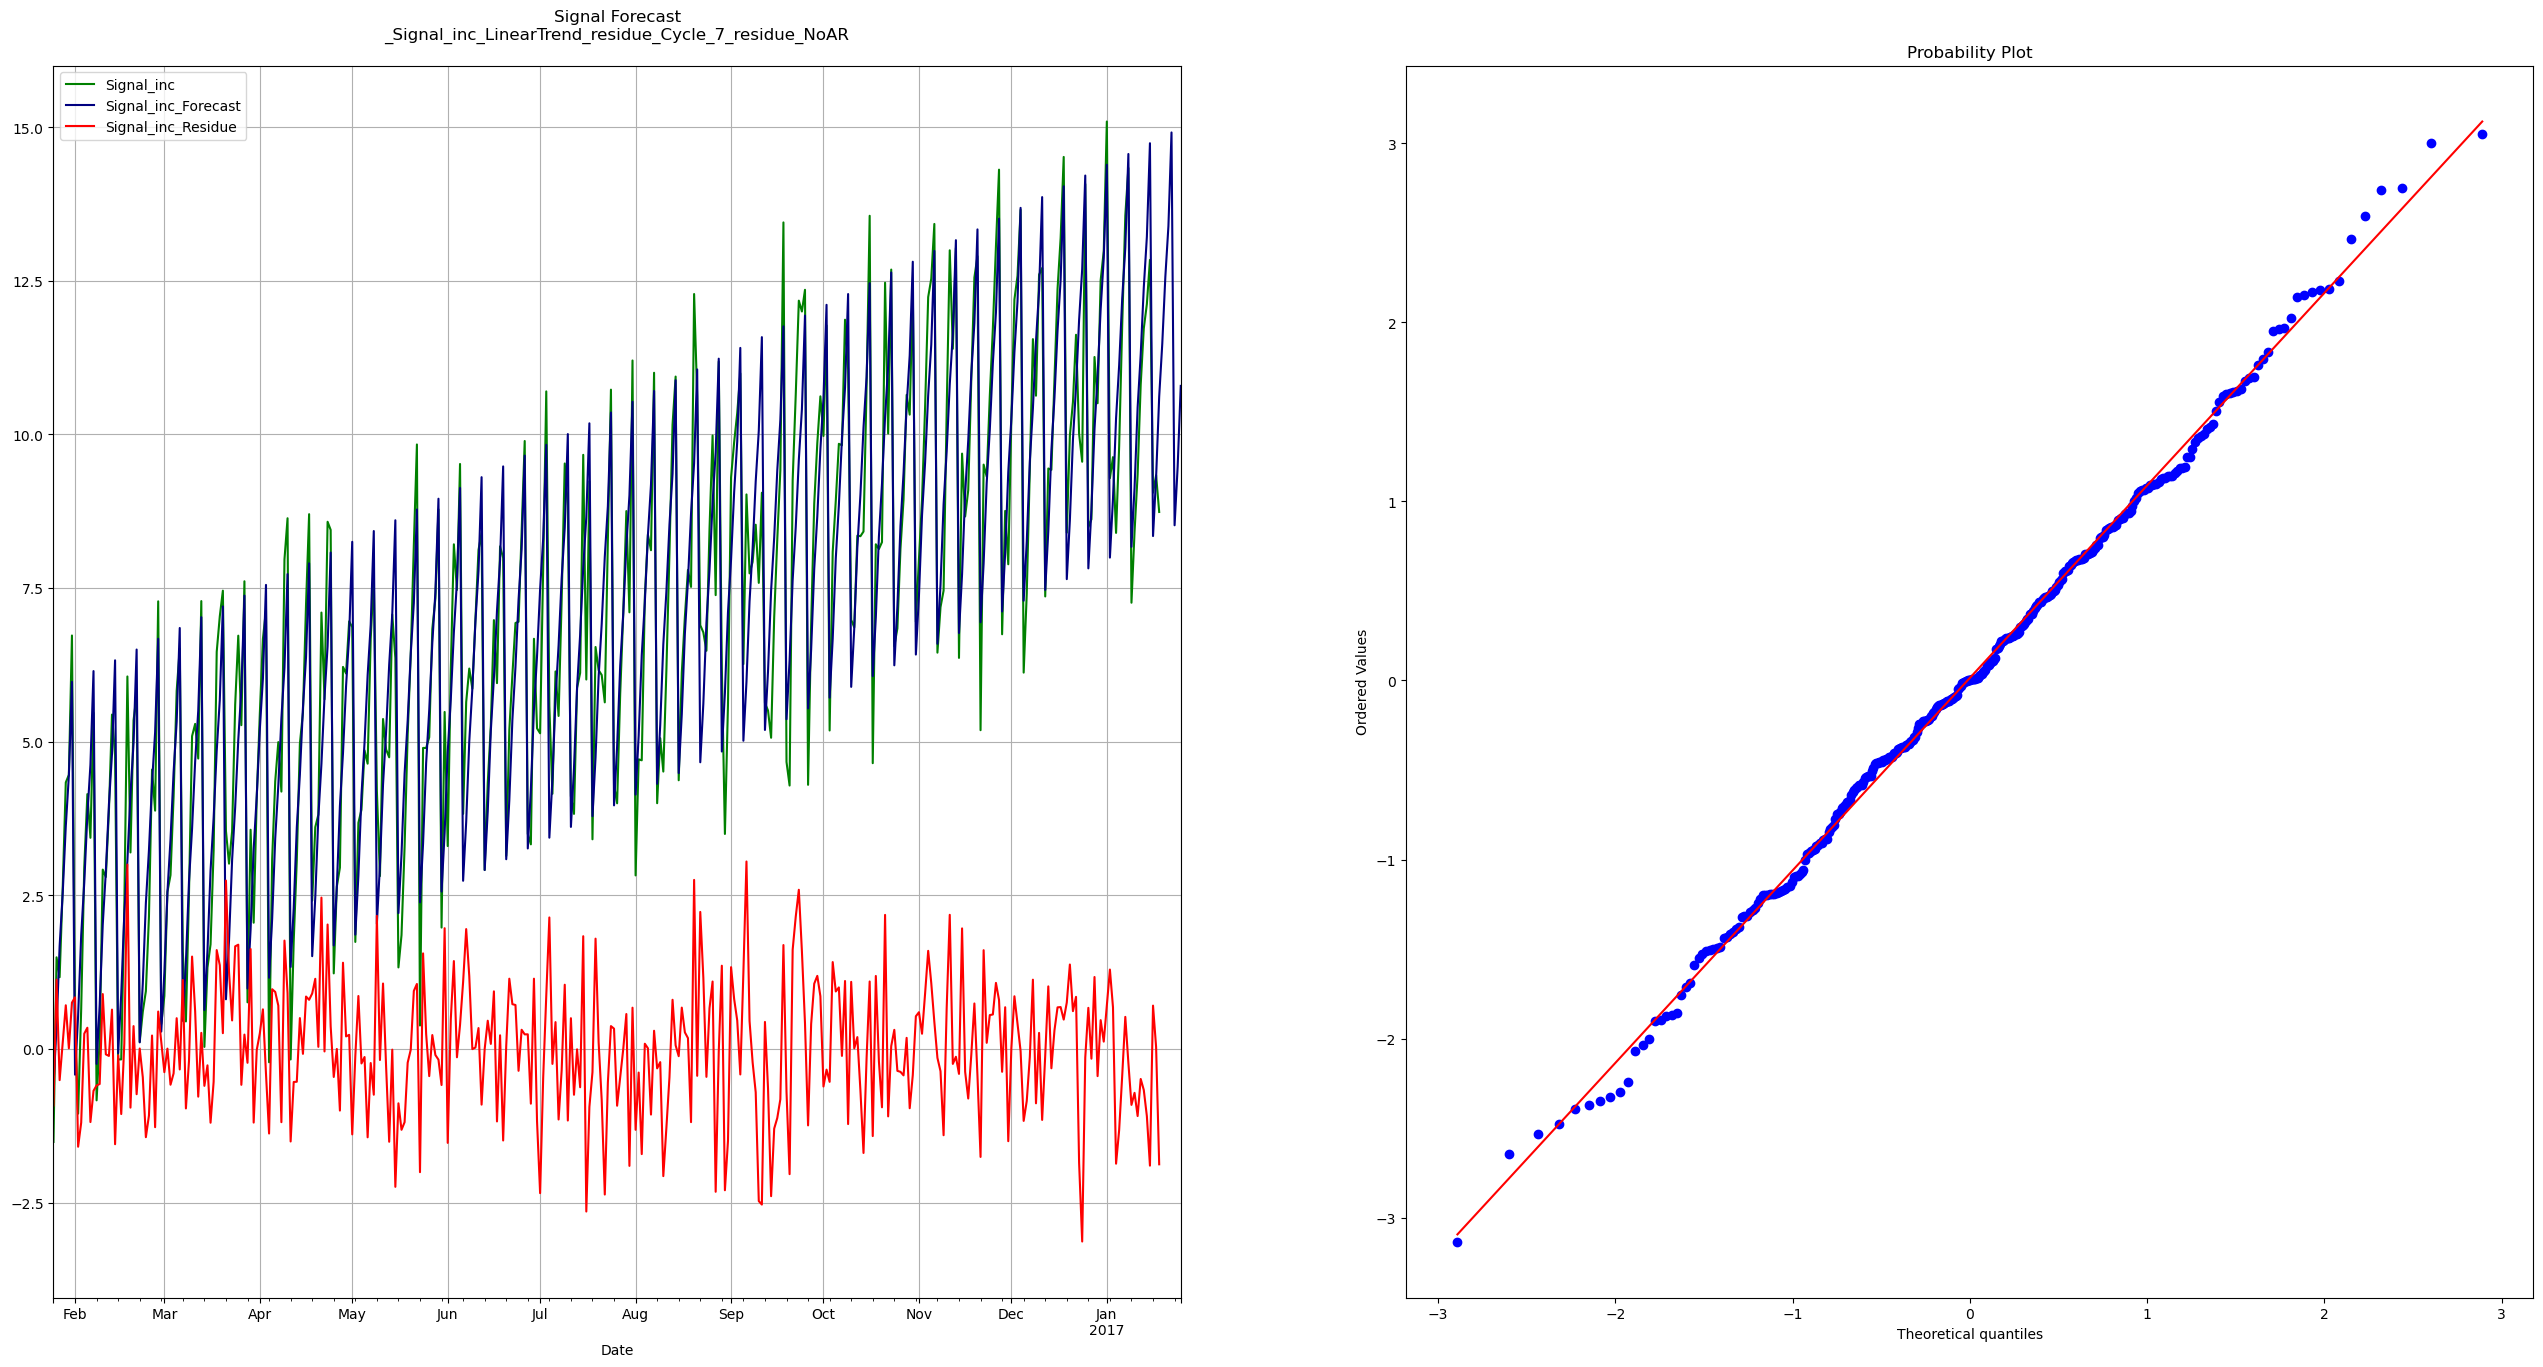

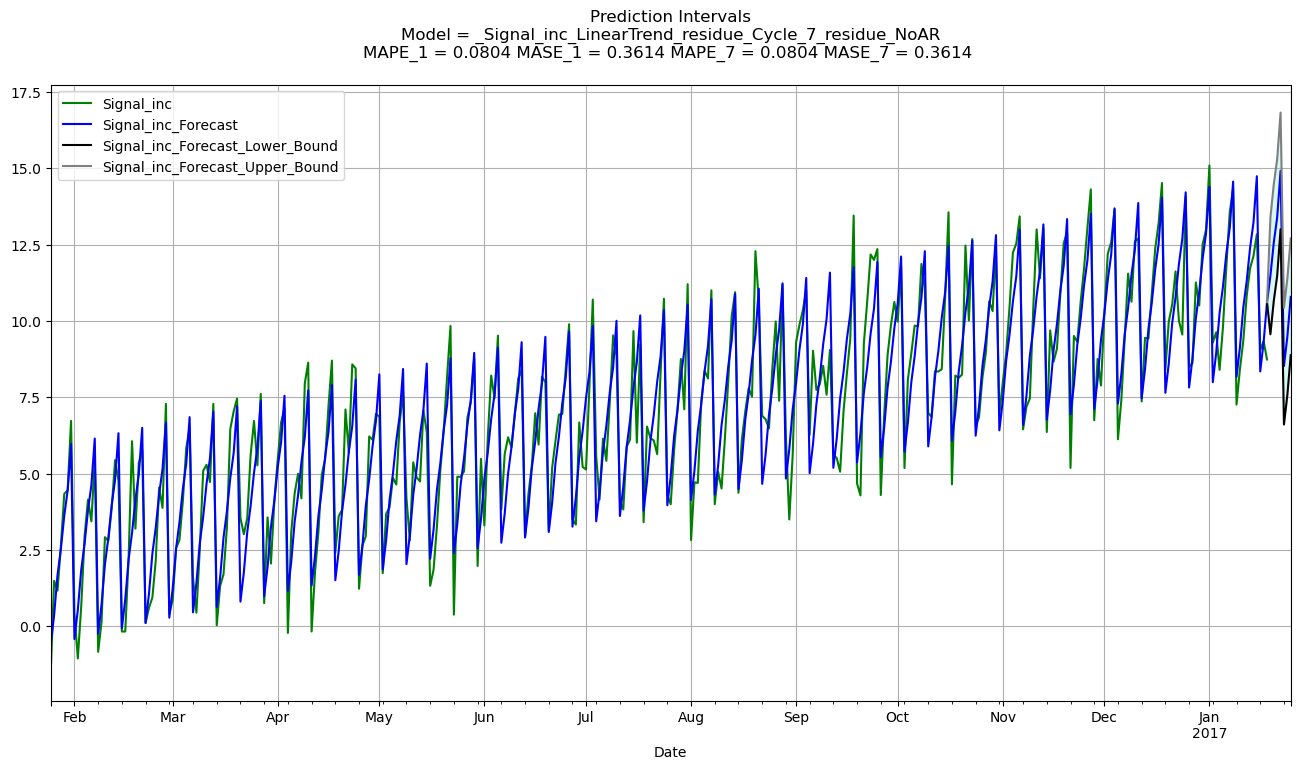

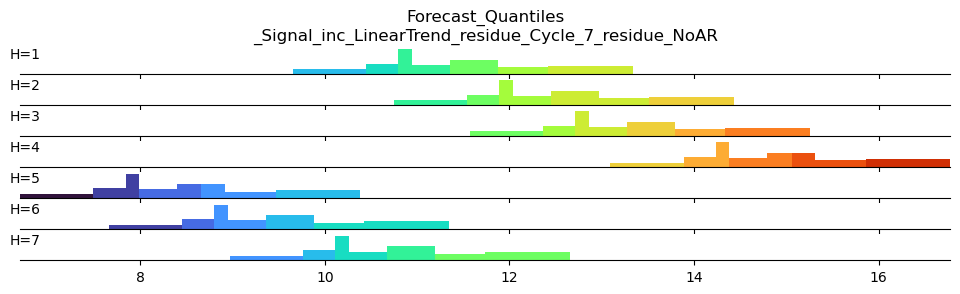

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
print(df_forecast['Date'].tail(7).values)

print(df_forecast['Signal_inc_Forecast'].tail(7).values)
print(df_forecast['Signal_dec_Forecast'].tail(7).values)

INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizons': {'Signal_dec': 7, 'Signal_inc': 7}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.253


Index(['Date', 'Signal_dec', 'row_number', 'Date_Normalized',
       'Signal_dec_scaled', '_Signal_dec', '_Signal_dec_LinearTrend',
       '_Signal_dec_LinearTrend_residue', 'cycle_internal',
       '_Signal_dec_LinearTrend_residue_Cycle_7',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue_NoAR',
       '_Signal_dec_LinearTrend_residue_Cycle_7_residue_NoAR_residue',
       'Signal_dec_Transformed', '_Signal_dec_Trend',
       '_Signal_dec_Trend_residue', '_Signal_dec_Cycle',
       '_Signal_dec_Cycle_residue', '_Signal_dec_AR', '_Signal_dec_AR_residue',
       '_Signal_dec_TransformedForecast',
       'Signal_dec_TransformedForecast_inverted', 'Signal_dec_Forecast',
       '_Signal_dec_TransformedResidue', 'Signal_dec_Residue',
       'Signal_dec_Forecast_Lower_Bound', 'Signal_dec_Forecast_Upper_Bound',
       'Signal_dec_Forecast_Quantile_2', 'Signal_dec_Forecast_Quantile_14',
       'Signal_dec_Forecast_Quantile_26', 'S